## 1) Kütüphanelerin Yüklenmesi

In [1]:
import pandas as pd 
import warnings
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
warnings.filterwarnings('ignore')

##  2) veri setini inceleme

### Date:
 Verinin toplandığı tarihi belirtir. Genellikle yıl, ay ve gün formatında (örn. YYYY-MM-DD) yer alır.
 
### Location:
 Verinin toplandığı yeri belirtir. Bu sütun, şehir veya bölge adını içerebilir.
 
### MinTemp:
 O gün içinde ölçülen en düşük sıcaklığı belirtir. Genellikle Celsius cinsindendir.
 
### MaxTemp:
 O gün içinde ölçülen en yüksek sıcaklığı belirtir. Genellikle Celsius cinsindendir.
Önem: Sıcaklık dalgalanmalarını anlamak ve sıcak hava dalgalarını izlemek için kullanılır.
### Rainfall:
 O gün içinde ölçülen yağış miktarını belirtir. Genellikle milimetre (mm) cinsindendir.
### Evaporation:
 O gün içinde buharlaşma miktarını belirtir. Genellikle milimetre (mm) cinsindendir.
### Sunshine:
 O gün boyunca güneş ışığına maruz kalma süresini belirtir. Genellikle saat cinsindendir.
### WindGustDir:
 O gün içinde en yüksek rüzgar hızı yönünü belirtir. Genellikle coğrafi yönler (kuzey, güney, doğu, batı) şeklinde ifade edilir.
### WindGustSpeed:
 O gün içinde ölçülen en yüksek rüzgar hızını belirtir. Genellikle kilometre/saat (km/h) cinsindendir.
### WindDir9am:
 O gün saat 9:00'da rüzgarın yönünü belirtir. Genellikle coğrafi yönler şeklinde ifade edilir.

In [2]:
df = pd.read_csv("/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


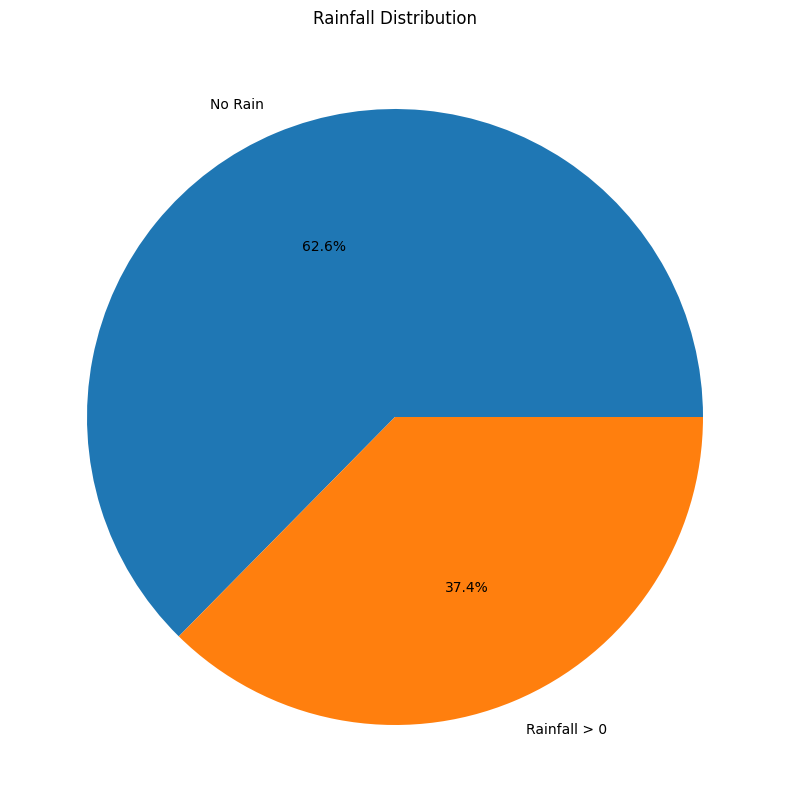

In [4]:
# Koşul ekleme: 0 olanları "No Rain" olarak gruplandır, diğerlerini "Rainfall > 0" kategorisi yap
df['Rainfall_Group'] = df['Rainfall'].apply(lambda x: 'No Rain' if x == 0 else 'Rainfall > 0')

# Gruplama ve sayma
grouped_data = df.groupby('Rainfall_Group')['Rainfall_Group'].count()

# Pie chart oluşturma
grouped_data.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10))
plt.ylabel('')  # Y eksenini temizlemek için
plt.title('Rainfall Distribution')
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            145460 non-null  object 
 1   Location        145460 non-null  object 
 2   MinTemp         143975 non-null  float64
 3   MaxTemp         144199 non-null  float64
 4   Rainfall        142199 non-null  float64
 5   Evaporation     82670 non-null   float64
 6   Sunshine        75625 non-null   float64
 7   WindGustDir     135134 non-null  object 
 8   WindGustSpeed   135197 non-null  float64
 9   WindDir9am      134894 non-null  object 
 10  WindDir3pm      141232 non-null  object 
 11  WindSpeed9am    143693 non-null  float64
 12  WindSpeed3pm    142398 non-null  float64
 13  Humidity9am     142806 non-null  float64
 14  Humidity3pm     140953 non-null  float64
 15  Pressure9am     130395 non-null  float64
 16  Pressure3pm     130432 non-null  float64
 17  Cloud9am  


 isnull(): DataFrame'deki her bir hücreyi kontrol eder ve eksik (NaN) değerler için True, diğer tüm değerler için False döner.
 
sum(): True değerleri 1, False değerleri 0 olarak kabul eder ve her sütun için toplamını alır. Bu işlem sonucunda, her sütundaki eksik değerlerin toplamını gösteren bir pandas Series elde edilir. 

Amaç: Bu kod, eksik veri analizi yapmak için kullanılır. Çıktıda her sütun için eksik veri sayıları yer alır, bu da veri temizleme işl emi öncesinde eksik veri oranlarını anlamak için faydalı bir işlemdir. Projede istenilen rastgele NaN değerler oluşturma işlemininden sonra kıyaslama yapmak için bir değişkene atama işlemi yaptım.).

In [6]:
#Sütunlardaki eksik verileri kontrol edelim.
once=df.isnull().sum()
print(once)

Date                  0
Location              0
MinTemp            1485
MaxTemp            1261
Rainfall           3261
Evaporation       62790
Sunshine          69835
WindGustDir       10326
WindGustSpeed     10263
WindDir9am        10566
WindDir3pm         4228
WindSpeed9am       1767
WindSpeed3pm       3062
Humidity9am        2654
Humidity3pm        4507
Pressure9am       15065
Pressure3pm       15028
Cloud9am          55888
Cloud3pm          59358
Temp9am            1767
Temp3pm            3609
RainToday          3261
RainTomorrow       3267
Rainfall_Group        0
dtype: int64


In [7]:
import pandas as pd
import numpy as np
import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

In [8]:
old_df=df.copy()
df=add_random_missing_values(df)

In [9]:
#Güncel eksik değerleri kontrol edelim
sonra=df.isnull().sum()
print(sonra)


Date               7118
Location           7012
MinTemp            8474
MaxTemp            8232
Rainfall          10204
Evaporation       66750
Sunshine          73535
WindGustDir       17001
WindGustSpeed     16756
WindDir9am        17013
WindDir3pm        11023
WindSpeed9am       8728
WindSpeed3pm      10201
Humidity9am        9832
Humidity3pm       11381
Pressure9am       21519
Pressure3pm       21450
Cloud9am          60201
Cloud3pm          63549
Temp9am            8856
Temp3pm           10538
RainToday         10160
RainTomorrow      10176
Rainfall_Group     7067
dtype: int64


In [10]:
old_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_Group
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,Rainfall > 0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,No Rain
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,No Rain
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,No Rain
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,Rainfall > 0


## 3) veri setinde bulunan eksiklikleri tamamlama

##  3.1)Date sütununda bulunan verileri eksik olan satırdan bi önceki veri ile doldurduk

In [11]:

# Eksik değerleri bir önceki geçerli değerle doldur (forward fill)
df["Date"] = df["Date"].fillna(method="ffill")

In [12]:
#Güncel eksik değerleri kontrol edelim
sonra=df["Date"].isnull().sum()
print(sonra)


0


## 3.2)Location sütununda bulunan verileri doldurma


In [13]:
'''
Fonksiyon, eksik bir değeri doldururken, hem eksik değerin öncesindeki hem de sonrasındaki
belirli bir aralıkta (pencere boyutu pencere ile belirlenir) bulunan değerleri inceler. 
Bu değerler arasından hangisi daha fazla tekrar ediyorsa, eksik değeri onunla doldurur.

'''
def eksik_veri_doldur(kolon, pencere=5):
    for indeks in kolon[kolon.isnull()].index:  # Eksik değerlerin indekslerini bul
        # Önceki ve sonraki n değerleri al
        onceki_degerler = kolon[max(0, indeks - pencere):indeks]
        sonraki_degerler = kolon[indeks + 1:indeks + 1 + pencere]

        # Değerlerin sıklığını kontrol et
        onceki_sayim = Counter(onceki_degerler.dropna())
        sonraki_sayim = Counter(sonraki_degerler.dropna())

        # Hangi yönde en çok tekrar eden değer varsa, onu kullan
        if onceki_sayim and sonraki_sayim:  # Her iki yönde de veri varsa
            en_cok_onceki = onceki_sayim.most_common(1)[0]
            en_cok_sonraki = sonraki_sayim.most_common(1)[0]
            # Sıklık karşılaştırması
            if en_cok_onceki[1] >= en_cok_sonraki[1]:  # Önceki değer öncelikli
                kolon.at[indeks] = en_cok_onceki[0]
            else:
                kolon.at[indeks] = en_cok_sonraki[0]
        elif onceki_sayim:  # Sadece önceki değerler varsa
            kolon.at[indeks] = onceki_sayim.most_common(1)[0][0]
        elif sonraki_sayim:  # Sadece sonraki değerler varsa
            kolon.at[indeks] = sonraki_sayim.most_common(1)[0][0]

    return kolon

In [14]:

# Eksik değerlerin olduğu satırları bul ve göster
eksik_satirlar = df[df["Location"].isnull()]
eksik_satirlar

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_Group
16,2008-12-17,NaN,14.1,20.9,0.0,NaN,NaN,ENE,22.0,NaN,...,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,Yes,No Rain
32,2009-01-02,NaN,9.6,23.9,0.0,NaN,NaN,W,41.0,WSW,...,22.0,1014.4,1013.1,NaN,NaN,14.9,22.1,No,No,No Rain
33,2009-01-03,NaN,10.5,28.8,0.0,NaN,NaN,SSE,NaN,SSE,...,22.0,1018.7,1014.8,NaN,NaN,17.1,NaN,No,No,No Rain
46,2009-01-16,NaN,14.9,26.7,0.0,NaN,NaN,SW,56.0,WSW,...,20.0,1014.1,1012.7,NaN,NaN,18.0,25.5,No,NaN,No Rain
54,2009-01-24,NaN,NaN,30.6,0.0,NaN,NaN,W,54.0,W,...,21.0,1005.4,1007.6,NaN,NaN,23.3,29.7,No,No,No Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145334,2017-02-20,NaN,14.4,32.3,0.0,NaN,NaN,ENE,37.0,E,...,11.0,1014.6,1010.1,NaN,NaN,21.8,30.9,No,No,No Rain
145379,2017-04-06,NaN,12.2,31.0,0.0,NaN,NaN,ENE,41.0,E,...,10.0,1017.1,1012.3,NaN,NaN,20.6,29.9,NaN,No,No Rain
145413,2017-05-10,NaN,5.7,22.7,0.0,NaN,NaN,ENE,31.0,ESE,...,19.0,1023.2,1019.1,NaN,NaN,12.5,21.6,No,No,No Rain
145439,2017-06-05,NaN,4.9,20.7,0.0,NaN,NaN,E,37.0,ESE,...,11.0,1027.1,1023.9,NaN,NaN,10.3,19.8,No,No,No Rain


In [15]:
#Güncel eksik değerleri kontrol edelim
sonra=df.isnull().sum()
print(sonra)

Date                  0
Location           7012
MinTemp            8474
MaxTemp            8232
Rainfall          10204
Evaporation       66750
Sunshine          73535
WindGustDir       17001
WindGustSpeed     16756
WindDir9am        17013
WindDir3pm        11023
WindSpeed9am       8728
WindSpeed3pm      10201
Humidity9am        9832
Humidity3pm       11381
Pressure9am       21519
Pressure3pm       21450
Cloud9am          60201
Cloud3pm          63549
Temp9am            8856
Temp3pm           10538
RainToday         10160
RainTomorrow      10176
Rainfall_Group     7067
dtype: int64


In [16]:
df["Location"]=eksik_veri_doldur(df["Location"]) #fonksiyonu kullanarak eksik değerleri doldurduk

In [17]:
#ekisk olan satırları doldurduktan sonra kontrol ediyoruz 
pd.DataFrame(df.iloc[10,1:])

,10
Location,Albury
MinTemp,13.4
MaxTemp,30.4
Rainfall,0.0
Evaporation,NaN
Sunshine,NaN
WindGustDir,N
WindGustSpeed,30.0
WindDir9am,SSE
WindDir3pm,ESE


## 3.3)MinTemp sütunundaki eksik yerleri doldurma

In [18]:
# Eksik değerlerin olduğu satırları bul ve göster
eksik_satirlar = df[df["MinTemp"].isnull()]
eksik_satirlar

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_Group
8,2008-12-09,Albury,NaN,31.9,0.0,NaN,NaN,NaN,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes,No Rain
31,2009-01-01,Albury,NaN,26.5,0.0,NaN,NaN,WNW,56.0,W,...,26.0,1004.5,1003.2,NaN,NaN,19.7,25.7,No,No,No Rain
54,2009-01-24,Albury,NaN,30.6,0.0,NaN,NaN,W,54.0,W,...,21.0,1005.4,1007.6,NaN,NaN,23.3,29.7,No,No,No Rain
75,2009-02-14,Albury,NaN,29.2,0.0,NaN,NaN,NE,39.0,S,...,18.0,1022.5,1016.4,NaN,NaN,18.3,28.5,No,No,No Rain
87,2009-02-26,Albury,NaN,32.7,0.0,NaN,NaN,ESE,26.0,ESE,...,19.0,NaN,1015.0,NaN,NaN,20.7,30.5,No,No,No Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145370,2017-03-28,Uluru,NaN,37.0,0.0,NaN,NaN,E,35.0,ESE,...,20.0,1013.1,1008.7,NaN,1.0,27.4,NaN,No,No,No Rain
145384,2017-04-11,Uluru,NaN,26.1,0.0,NaN,NaN,NaN,44.0,NaN,...,16.0,NaN,1016.1,NaN,NaN,16.1,24.8,No,No,No Rain
145406,2017-05-03,Uluru,NaN,NaN,0.0,NaN,NaN,E,44.0,E,...,33.0,1026.2,1022.3,NaN,NaN,14.3,21.2,No,No,No Rain
145407,2017-05-04,Uluru,NaN,22.9,0.0,NaN,NaN,E,35.0,E,...,28.0,1025.8,1021.9,NaN,NaN,13.8,22.2,No,No,No Rain


In [19]:
mean_value = df['MinTemp'].mean()  # MinTemp sütunundaki ortalamayı hesapla
df['MinTemp'].fillna(mean_value, inplace=True)  # NaN değerleri ortalama ile doldur

In [20]:
# doldurduğumuz satırı kontol ediyoruz
print(mean_value)
df.iloc[145375,:]

12.190787379732235


Date              2017-04-02
Location               Uluru
MinTemp                 13.1
MaxTemp                 27.9
Rainfall                 0.0
Evaporation              NaN
Sunshine                 NaN
WindGustDir                E
WindGustSpeed           48.0
WindDir9am               ESE
WindDir3pm               ESE
WindSpeed9am            22.0
WindSpeed3pm            26.0
Humidity9am             31.0
Humidity3pm             19.0
Pressure9am           1022.7
Pressure3pm           1018.3
Cloud9am                 NaN
Cloud3pm                 NaN
Temp9am                 19.3
Temp3pm                 26.8
RainToday                NaN
RainTomorrow              No
Rainfall_Group       No Rain
Name: 145375, dtype: object

In [21]:
#Güncel eksik değerleri kontrol edelim
sonra=df.isnull().sum()
print(sonra)

Date                  0
Location              0
MinTemp               0
MaxTemp            8232
Rainfall          10204
Evaporation       66750
Sunshine          73535
WindGustDir       17001
WindGustSpeed     16756
WindDir9am        17013
WindDir3pm        11023
WindSpeed9am       8728
WindSpeed3pm      10201
Humidity9am        9832
Humidity3pm       11381
Pressure9am       21519
Pressure3pm       21450
Cloud9am          60201
Cloud3pm          63549
Temp9am            8856
Temp3pm           10538
RainToday         10160
RainTomorrow      10176
Rainfall_Group     7067
dtype: int64


## 3.4)MaxTempdeki eksik verileri doldurma


In [22]:
# Eksik değerlerin olduğu satırları bul ve göster
eksik_satirlar = df[df["MaxTemp"].isnull()]
eksik_satirlar

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_Group
12,2008-12-11,Albury,15.9,NaN,15.6,NaN,NaN,W,61.0,NNW,...,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes,Rainfall > 0
13,2008-12-14,Albury,12.6,NaN,3.6,NaN,NaN,SW,44.0,W,...,43.0,1001.2,NaN,NaN,7.0,15.8,19.8,Yes,No,Rainfall > 0
15,2008-12-16,Albury,9.8,NaN,NaN,NaN,NaN,WNW,50.0,NaN,...,28.0,1013.4,1010.3,0.0,NaN,17.3,26.2,NaN,No,Rainfall > 0
17,2008-12-18,Albury,13.5,NaN,16.8,NaN,NaN,W,63.0,N,...,65.0,1005.8,1002.2,8.0,1.0,18.0,21.5,Yes,Yes,Rainfall > 0
21,2008-12-22,Albury,17.1,NaN,0.0,NaN,NaN,NE,NaN,NE,...,28.0,1013.6,1008.1,NaN,1.0,NaN,31.6,No,No,No Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145419,2017-05-16,Uluru,6.4,NaN,0.0,NaN,NaN,NW,50.0,N,...,NaN,1014.5,1009.9,NaN,NaN,NaN,28.8,No,No,No Rain
145426,2017-05-23,Uluru,7.6,NaN,NaN,NaN,NaN,SE,24.0,S,...,27.0,1021.4,1017.8,NaN,NaN,15.7,26.8,No,No,No Rain
145444,2017-06-10,Uluru,3.2,NaN,0.0,NaN,NaN,E,46.0,ESE,...,29.0,1031.0,1027.2,NaN,NaN,8.2,17.4,No,No,No Rain
145458,2017-06-24,Uluru,7.8,NaN,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,No Rain


In [23]:
mean_value = df['MaxTemp'].mean()  # MaxTemp sütunundaki ortalamayı hesapla
df['MaxTemp'].fillna(mean_value, inplace=True)  # NaN değerleri ortalama ile doldur

In [24]:
print(mean_value)
df.iloc[145416]

23.21716850788469


Date              2017-05-13
Location               Uluru
MinTemp                  6.8
MaxTemp                 28.7
Rainfall                 0.0
Evaporation              NaN
Sunshine                 NaN
WindGustDir               NW
WindGustSpeed           37.0
WindDir9am                SE
WindDir3pm               NaN
WindSpeed9am             2.0
WindSpeed3pm            24.0
Humidity9am             43.0
Humidity3pm             19.0
Pressure9am           1016.9
Pressure3pm           1014.6
Cloud9am                 NaN
Cloud3pm                 1.0
Temp9am                 15.2
Temp3pm                 27.5
RainToday                 No
RainTomorrow              No
Rainfall_Group       No Rain
Name: 145416, dtype: object

In [25]:
#Güncel eksik değerleri kontrol edelim
sonra=df.isnull().sum()
print(sonra)

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall          10204
Evaporation       66750
Sunshine          73535
WindGustDir       17001
WindGustSpeed     16756
WindDir9am        17013
WindDir3pm        11023
WindSpeed9am       8728
WindSpeed3pm      10201
Humidity9am        9832
Humidity3pm       11381
Pressure9am       21519
Pressure3pm       21450
Cloud9am          60201
Cloud3pm          63549
Temp9am            8856
Temp3pm           10538
RainToday         10160
RainTomorrow      10176
Rainfall_Group     7067
dtype: int64


## Rainfall sütunundaki eksik verileri doldurma işlemi

In [26]:
# Eksik değerlerin olduğu satırları bul ve göster
eksik_satirlar = df[df["Rainfall"].isnull()]
eksik_satirlar

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_Group
15,2008-12-16,Albury,9.8,23.217169,NaN,NaN,NaN,WNW,50.0,NaN,...,28.0,1013.4,1010.3,0.0,NaN,17.3,26.2,NaN,No,Rainfall > 0
78,2009-02-17,Albury,12.5,28.800000,NaN,NaN,NaN,N,NaN,SSE,...,17.0,1017.2,1013.5,NaN,NaN,18.0,27.0,No,No,No Rain
96,2009-03-07,Albury,8.3,27.900000,NaN,NaN,NaN,W,37.0,S,...,22.0,1015.2,1012.4,NaN,NaN,13.3,27.0,No,No,No Rain
113,2009-03-24,Albury,10.8,31.900000,NaN,NaN,NaN,S,48.0,SSE,...,20.0,1016.5,1014.4,NaN,NaN,15.4,30.7,No,NaN,No Rain
134,2009-04-14,Albury,12.2,25.000000,NaN,NaN,NaN,WNW,NaN,NaN,...,39.0,1016.3,1011.6,6.0,NaN,16.2,24.6,No,No,No Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145336,2017-02-22,Uluru,16.1,38.000000,NaN,NaN,NaN,SSW,35.0,SSW,...,16.0,1011.4,1008.6,NaN,NaN,27.7,36.4,NaN,No,Rainfall > 0
145360,2017-03-18,Uluru,20.3,38.800000,NaN,NaN,NaN,ENE,37.0,E,...,14.0,1015.7,1011.0,NaN,NaN,28.6,37.1,No,No,No Rain
145426,2017-05-23,Uluru,7.6,23.217169,NaN,NaN,NaN,SE,24.0,S,...,27.0,1021.4,1017.8,NaN,NaN,15.7,26.8,No,No,No Rain
145428,2017-05-25,Uluru,14.6,26.300000,NaN,NaN,NaN,S,37.0,SSW,...,36.0,1022.0,1018.6,7.0,1.0,15.4,25.0,No,No,No Rain


In [27]:
df["Rainfall"]=eksik_veri_doldur(df["Rainfall"])

In [28]:
df.iloc[145365,:]

Date              2017-03-23
Location               Uluru
MinTemp                 24.6
MaxTemp                 40.8
Rainfall                 0.0
Evaporation              NaN
Sunshine                 NaN
WindGustDir                N
WindGustSpeed           33.0
WindDir9am                 E
WindDir3pm                SE
WindSpeed9am            17.0
WindSpeed3pm             7.0
Humidity9am             28.0
Humidity3pm             13.0
Pressure9am           1012.0
Pressure3pm           1007.8
Cloud9am                 NaN
Cloud3pm                 NaN
Temp9am                 29.2
Temp3pm                 38.8
RainToday                 No
RainTomorrow              No
Rainfall_Group       No Rain
Name: 145365, dtype: object

In [29]:
#Güncel eksik değerleri kontrol edelim
sonra=df.isnull().sum()
print(sonra)

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation       66750
Sunshine          73535
WindGustDir       17001
WindGustSpeed     16756
WindDir9am        17013
WindDir3pm        11023
WindSpeed9am       8728
WindSpeed3pm      10201
Humidity9am        9832
Humidity3pm       11381
Pressure9am       21519
Pressure3pm       21450
Cloud9am          60201
Cloud3pm          63549
Temp9am            8856
Temp3pm           10538
RainToday         10160
RainTomorrow      10176
Rainfall_Group     7067
dtype: int64


##  3.5)Evaporation sütununda bulunan eksik verileri doldurma


In [30]:
# Eksik değerlerin olduğu satırları bul ve göster
eksik_satirlar = df[df["Evaporation"].isnull()]

eksik_satirlar

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_Group
0,2008-12-01,Albury,13.4,22.900000,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,NaN,NaN,16.9,21.8,No,No,Rainfall > 0
1,2008-12-02,Albury,7.4,25.100000,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,No Rain
2,2008-12-03,Albury,12.9,25.700000,0.0,NaN,NaN,NaN,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,NaN
3,2008-12-04,Albury,9.2,28.000000,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,No Rain
4,2008-12-05,Albury,17.5,32.300000,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,Rainfall > 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,No Rain
145456,2017-06-22,Uluru,3.6,25.300000,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,No Rain
145457,2017-06-23,Uluru,5.4,26.900000,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,NaN,NaN,NaN,12.5,26.1,No,No,No Rain
145458,2017-06-24,Uluru,7.8,23.217169,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,No Rain


In [31]:
dolu_satirlar = df[df['Evaporation'].notna()]
dolu_satirlar   

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_Group
6049,2009-01-01,Cobar,17.9,35.200000,0.0,12.0,12.3,SSW,48.0,ENE,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,No Rain
6050,2009-01-02,Cobar,18.4,28.900000,0.0,14.8,NaN,S,37.0,SSE,...,8.0,1012.9,NaN,1.0,1.0,20.3,27.0,No,No,No Rain
6051,2009-01-03,Cobar,15.5,34.100000,0.0,12.6,13.3,SE,30.0,NaN,...,7.0,NaN,1011.6,NaN,1.0,NaN,32.7,No,No,No Rain
6052,2009-01-04,Cobar,19.4,37.600000,0.0,10.8,10.6,NNE,46.0,NNE,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,No Rain
6053,2009-01-05,Cobar,21.9,38.400000,0.0,11.4,12.2,WNW,31.0,WNW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143876,2017-06-20,Katherine,15.0,32.000000,0.0,9.6,NaN,E,35.0,SE,...,NaN,1015.9,1012.1,0.0,NaN,21.8,NaN,No,NaN,No Rain
143877,2017-06-21,Katherine,15.4,31.500000,0.0,3.6,NaN,ESE,43.0,ESE,...,NaN,1016.6,1012.7,0.0,NaN,21.6,NaN,No,No,No Rain
143878,2017-06-22,Katherine,12.2,31.500000,0.0,4.0,NaN,ESE,37.0,SE,...,NaN,1017.1,1012.8,0.0,NaN,19.9,NaN,No,No,No Rain
143879,2017-06-23,Katherine,14.9,31.500000,0.0,6.4,NaN,NaN,41.0,SE,...,NaN,1016.1,1011.8,0.0,NaN,22.8,NaN,No,No,No Rain


In [32]:
mean_value = df['Evaporation'].mean()  # Evaporation sütunundaki ortalamayı hesapla
df['Evaporation'].fillna(mean_value, inplace=True)  # NaN değerleri ortalama ile doldur

In [33]:
mean_value

5.4713988057425995

In [34]:
old_df.iloc[145458,:]

Date              2017-06-24
Location               Uluru
MinTemp                  7.8
MaxTemp                 27.0
Rainfall                 0.0
Evaporation              NaN
Sunshine                 NaN
WindGustDir               SE
WindGustSpeed           28.0
WindDir9am               SSE
WindDir3pm                 N
WindSpeed9am            13.0
WindSpeed3pm             7.0
Humidity9am             51.0
Humidity3pm             24.0
Pressure9am           1019.4
Pressure3pm           1016.5
Cloud9am                 3.0
Cloud3pm                 2.0
Temp9am                 15.1
Temp3pm                 26.0
RainToday                 No
RainTomorrow              No
Rainfall_Group       No Rain
Name: 145458, dtype: object

In [35]:
df.iloc[145458,:]

Date              2017-06-24
Location               Uluru
MinTemp                  7.8
MaxTemp            23.217169
Rainfall                 0.0
Evaporation         5.471399
Sunshine                 NaN
WindGustDir               SE
WindGustSpeed           28.0
WindDir9am               SSE
WindDir3pm                 N
WindSpeed9am            13.0
WindSpeed3pm             7.0
Humidity9am             51.0
Humidity3pm             24.0
Pressure9am           1019.4
Pressure3pm           1016.5
Cloud9am                 3.0
Cloud3pm                 2.0
Temp9am                 15.1
Temp3pm                 26.0
RainToday                 No
RainTomorrow              No
Rainfall_Group       No Rain
Name: 145458, dtype: object

In [36]:
#Güncel eksik değerleri kontrol edelim
sonra=df.isnull().sum()
print(sonra)

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine          73535
WindGustDir       17001
WindGustSpeed     16756
WindDir9am        17013
WindDir3pm        11023
WindSpeed9am       8728
WindSpeed3pm      10201
Humidity9am        9832
Humidity3pm       11381
Pressure9am       21519
Pressure3pm       21450
Cloud9am          60201
Cloud3pm          63549
Temp9am            8856
Temp3pm           10538
RainToday         10160
RainTomorrow      10176
Rainfall_Group     7067
dtype: int64


## 3.6)Sunshine sütununda bulunan boş değerleri doldurma


In [37]:
# Eksik değerlerin olduğu satırları bul ve göster
eksik_satirlar = df[df["Sunshine"].isnull()]
eksik_satirlar

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_Group
0,2008-12-01,Albury,13.4,22.900000,0.6,5.471399,NaN,W,44.0,W,...,22.0,1007.7,1007.1,NaN,NaN,16.9,21.8,No,No,Rainfall > 0
1,2008-12-02,Albury,7.4,25.100000,0.0,5.471399,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,No Rain
2,2008-12-03,Albury,12.9,25.700000,0.0,5.471399,NaN,NaN,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,NaN
3,2008-12-04,Albury,9.2,28.000000,0.0,5.471399,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,No Rain
4,2008-12-05,Albury,17.5,32.300000,1.0,5.471399,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,Rainfall > 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,5.471399,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,No Rain
145456,2017-06-22,Uluru,3.6,25.300000,0.0,5.471399,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,No Rain
145457,2017-06-23,Uluru,5.4,26.900000,0.0,5.471399,NaN,N,37.0,SE,...,24.0,1021.0,NaN,NaN,NaN,12.5,26.1,No,No,No Rain
145458,2017-06-24,Uluru,7.8,23.217169,0.0,5.471399,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,No Rain


In [38]:
mean_value = df['Sunshine'].mean()  # Sunshine sütunundaki ortalamayı hesapla
df['Sunshine'].fillna(mean_value, inplace=True)  # NaN değerleri ortalama ile doldur

In [39]:
df.iloc[145456]

Date              2017-06-22
Location               Uluru
MinTemp                  3.6
MaxTemp                 25.3
Rainfall                 0.0
Evaporation         5.471399
Sunshine            7.605999
WindGustDir              NNW
WindGustSpeed           22.0
WindDir9am                SE
WindDir3pm               NaN
WindSpeed9am            13.0
WindSpeed3pm             9.0
Humidity9am             56.0
Humidity3pm             21.0
Pressure9am           1023.5
Pressure3pm           1019.1
Cloud9am                 NaN
Cloud3pm                 NaN
Temp9am                 10.9
Temp3pm                 24.5
RainToday                 No
RainTomorrow              No
Rainfall_Group       No Rain
Name: 145456, dtype: object

In [40]:
#Güncel eksik değerleri kontrol edelim
sonra=df.isnull().sum()
print(sonra)

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustDir       17001
WindGustSpeed     16756
WindDir9am        17013
WindDir3pm        11023
WindSpeed9am       8728
WindSpeed3pm      10201
Humidity9am        9832
Humidity3pm       11381
Pressure9am       21519
Pressure3pm       21450
Cloud9am          60201
Cloud3pm          63549
Temp9am            8856
Temp3pm           10538
RainToday         10160
RainTomorrow      10176
Rainfall_Group     7067
dtype: int64


## 3.7)WindGustDir sütununda bulunan boş satırları doldurma

In [41]:
# windgustdir sütununda bulunan boş verileri gösteren kod 
eksik_satırlar=df[df["WindGustDir"].isnull()]
eksik_satırlar


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_Group
2,2008-12-03,Albury,12.900000,25.700000,0.0,5.471399,7.605999,NaN,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,NaN
8,2008-12-09,Albury,12.190787,31.900000,0.0,5.471399,7.605999,NaN,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes,No Rain
14,2008-12-15,Albury,8.400000,24.600000,0.0,5.471399,7.605999,NaN,NaN,S,...,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,No,NaN,No Rain
50,2009-01-20,Albury,18.600000,39.900000,0.0,5.471399,7.605999,NaN,61.0,SSE,...,21.0,1010.1,1004.8,NaN,NaN,26.8,37.7,No,No,No Rain
61,2009-01-31,Albury,22.000000,42.700000,0.0,5.471399,7.605999,NaN,48.0,ESE,...,11.0,1014.2,1010.5,NaN,NaN,29.9,42.0,No,No,No Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145385,2017-04-12,Uluru,9.600000,28.400000,0.0,5.471399,7.605999,NaN,33.0,E,...,12.0,1020.3,1016.2,NaN,NaN,16.9,26.8,No,No,No Rain
145393,2017-04-20,Uluru,18.600000,28.600000,34.6,5.471399,7.605999,NaN,46.0,E,...,56.0,1020.0,1015.8,8.0,5.0,19.8,26.9,Yes,Yes,Rainfall > 0
145443,2017-06-09,Uluru,3.400000,19.800000,0.0,5.471399,7.605999,NaN,43.0,ESE,...,23.0,1031.8,1027.7,NaN,NaN,8.7,18.9,No,No,NaN
145454,2017-06-20,Uluru,3.500000,21.800000,0.0,5.471399,7.605999,NaN,31.0,ESE,...,27.0,1024.7,NaN,NaN,NaN,9.4,20.9,No,No,No Rain


In [42]:

# WindGustDir sütunundaki en çok tekrar eden değeri bulma
most_frequent_value = df['WindGustDir'].mode()[0]  # mode()[0] ilk en sık tekrar eden değeri alır

# MinTemp sütunundaki NaN (boş) değerleri en çok tekrar eden değerle doldurma
df['WindGustDir'].fillna(most_frequent_value, inplace=True)

In [43]:
df.iloc[145446]

Date              2017-06-12
Location               Uluru
MinTemp                  5.1
MaxTemp                 19.7
Rainfall                 0.0
Evaporation         5.471399
Sunshine            7.605999
WindGustDir                E
WindGustSpeed           46.0
WindDir9am               ESE
WindDir3pm                 E
WindSpeed9am            13.0
WindSpeed3pm            17.0
Humidity9am              NaN
Humidity3pm             29.0
Pressure9am           1028.5
Pressure3pm           1025.8
Cloud9am                 NaN
Cloud3pm                 NaN
Temp9am                  8.5
Temp3pm                 19.2
RainToday                 No
RainTomorrow              No
Rainfall_Group       No Rain
Name: 145446, dtype: object

In [44]:
#Güncel eksik değerleri kontrol edelim
sonra=df.isnull().sum()
print(sonra)

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustDir           0
WindGustSpeed     16756
WindDir9am        17013
WindDir3pm        11023
WindSpeed9am       8728
WindSpeed3pm      10201
Humidity9am        9832
Humidity3pm       11381
Pressure9am       21519
Pressure3pm       21450
Cloud9am          60201
Cloud3pm          63549
Temp9am            8856
Temp3pm           10538
RainToday         10160
RainTomorrow      10176
Rainfall_Group     7067
dtype: int64


##  3.8)WindGustSpeed sütununda bulunan eksik değerleri doldurma


In [45]:
eksik_veriler=df[df["WindGustSpeed"].isnull()]
eksik_veriler

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_Group
5,2008-12-06,Albury,14.6,29.700000,0.2,5.471399,7.605999,WNW,NaN,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No,Rainfall > 0
14,2008-12-15,Albury,8.4,24.600000,0.0,5.471399,7.605999,W,NaN,S,...,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,No,NaN,No Rain
21,2008-12-22,Albury,17.1,23.217169,0.0,5.471399,7.605999,NE,NaN,NE,...,28.0,1013.6,1008.1,NaN,1.0,NaN,31.6,No,No,No Rain
30,2008-12-31,Albury,12.0,24.400000,0.8,5.471399,7.605999,W,NaN,WNW,...,28.0,1006.1,NaN,1.0,NaN,16.9,22.7,No,No,Rainfall > 0
33,2009-01-03,Albury,10.5,28.800000,0.0,5.471399,7.605999,SSE,NaN,SSE,...,22.0,1018.7,1014.8,NaN,NaN,17.1,NaN,No,No,No Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145343,2017-03-01,Uluru,19.1,39.800000,0.0,5.471399,7.605999,ESE,NaN,E,...,14.0,1012.6,1009.9,NaN,2.0,29.9,38.0,No,No,No Rain
145354,2017-03-12,Uluru,26.6,36.400000,0.0,5.471399,7.605999,SSW,NaN,SSE,...,29.0,1010.8,1007.0,8.0,NaN,27.4,34.5,No,No,No Rain
145390,2017-04-17,Uluru,19.3,24.400000,0.0,5.471399,7.605999,W,NaN,ESE,...,91.0,1015.9,1013.9,8.0,8.0,21.3,18.5,No,Yes,No Rain
145414,2017-05-11,Uluru,4.1,24.700000,0.0,5.471399,7.605999,E,NaN,ESE,...,17.0,1022.1,1017.2,NaN,NaN,13.4,23.7,NaN,No,No Rain


In [46]:
# WindGustSpeed sütunundaki değerin ortalamasını aldıp nun yerlere yerleştiriyoruz
value=df["WindGustSpeed"].mean()

df["WindGustSpeed"].fillna(value, inplace=True)


In [47]:
value

40.03697631775236

In [48]:
df.iloc[145426]

Date              2017-05-23
Location               Uluru
MinTemp                  7.6
MaxTemp            23.217169
Rainfall                 0.0
Evaporation         5.471399
Sunshine            7.605999
WindGustDir               SE
WindGustSpeed           24.0
WindDir9am                 S
WindDir3pm                NE
WindSpeed9am             NaN
WindSpeed3pm            11.0
Humidity9am             53.0
Humidity3pm             27.0
Pressure9am           1021.4
Pressure3pm           1017.8
Cloud9am                 NaN
Cloud3pm                 NaN
Temp9am                 15.7
Temp3pm                 26.8
RainToday                 No
RainTomorrow              No
Rainfall_Group       No Rain
Name: 145426, dtype: object

In [49]:
#Güncel eksik değerleri kontrol edelim
sonra=df.isnull().sum()
print(sonra)

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustDir           0
WindGustSpeed         0
WindDir9am        17013
WindDir3pm        11023
WindSpeed9am       8728
WindSpeed3pm      10201
Humidity9am        9832
Humidity3pm       11381
Pressure9am       21519
Pressure3pm       21450
Cloud9am          60201
Cloud3pm          63549
Temp9am            8856
Temp3pm           10538
RainToday         10160
RainTomorrow      10176
Rainfall_Group     7067
dtype: int64


## 3.9)WindDir9am süütununda bulunan eksik verileri doldurma

In [50]:
#Güncel eksik değerleri kontrol edelim
sonra=df.isnull().sum()
print(sonra)

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustDir           0
WindGustSpeed         0
WindDir9am        17013
WindDir3pm        11023
WindSpeed9am       8728
WindSpeed3pm      10201
Humidity9am        9832
Humidity3pm       11381
Pressure9am       21519
Pressure3pm       21450
Cloud9am          60201
Cloud3pm          63549
Temp9am            8856
Temp3pm           10538
RainToday         10160
RainTomorrow      10176
Rainfall_Group     7067
dtype: int64


In [51]:
# eksik verileri görüntülüyoruz
eksik_veriler=df[df["WindDir9am"].isna()]
eksik_veriler 

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_Group
15,2008-12-16,Albury,9.8,23.217169,0.0,5.471399,7.605999,WNW,50.0,NaN,...,28.0,1013.4,1010.3,0.0,NaN,17.3,26.2,NaN,No,Rainfall > 0
16,2008-12-17,Albury,14.1,20.900000,0.0,5.471399,7.605999,ENE,22.0,NaN,...,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,Yes,No Rain
26,2008-12-27,Albury,16.9,33.000000,0.0,5.471399,7.605999,WSW,57.0,NaN,...,28.0,1006.8,1003.6,NaN,1.0,26.6,31.2,No,No,No Rain
29,2008-12-30,Albury,12.5,24.200000,1.2,5.471399,7.605999,WNW,50.0,NaN,...,70.0,1005.6,1003.4,8.0,8.0,12.5,18.2,Yes,No,Rainfall > 0
37,2009-01-07,Albury,16.1,38.900000,0.0,5.471399,7.605999,W,57.0,NaN,...,12.0,1007.0,1002.7,NaN,NaN,NaN,38.4,No,No,No Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145422,2017-05-19,Uluru,4.3,22.400000,0.0,5.471399,7.605999,ENE,26.0,NaN,...,33.0,1020.1,1014.8,NaN,NaN,10.9,21.3,No,No,No Rain
145429,2017-05-26,Uluru,14.3,27.600000,0.4,5.471399,7.605999,WNW,39.0,NaN,...,27.0,1020.5,1016.1,4.0,7.0,16.1,27.2,No,No,Rainfall > 0
145436,2017-06-02,Uluru,1.5,19.200000,0.0,5.471399,7.605999,E,37.0,NaN,...,18.0,1030.7,1026.7,NaN,NaN,6.8,17.6,No,No,No Rain
145438,2017-06-04,Uluru,4.5,18.800000,0.0,5.471399,7.605999,E,31.0,NaN,...,26.0,1026.9,1022.4,NaN,NaN,9.5,18.6,No,No,No Rain


In [52]:
#Güncel eksik değerleri kontrol edelim
sonra=df.isnull().sum()
print(sonra)

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustDir           0
WindGustSpeed         0
WindDir9am        17013
WindDir3pm        11023
WindSpeed9am       8728
WindSpeed3pm      10201
Humidity9am        9832
Humidity3pm       11381
Pressure9am       21519
Pressure3pm       21450
Cloud9am          60201
Cloud3pm          63549
Temp9am            8856
Temp3pm           10538
RainToday         10160
RainTomorrow      10176
Rainfall_Group     7067
dtype: int64


In [53]:
# sütundaki en çok tekrar eden veriyi nun yerlere yerleştiriyoruz
value=df["WindDir9am"].mode()[0]
value

'N'

In [54]:
#Güncel eksik değerleri kontrol edelim
sonra=df.isnull().sum()
print(sonra)

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustDir           0
WindGustSpeed         0
WindDir9am        17013
WindDir3pm        11023
WindSpeed9am       8728
WindSpeed3pm      10201
Humidity9am        9832
Humidity3pm       11381
Pressure9am       21519
Pressure3pm       21450
Cloud9am          60201
Cloud3pm          63549
Temp9am            8856
Temp3pm           10538
RainToday         10160
RainTomorrow      10176
Rainfall_Group     7067
dtype: int64


In [55]:
df["WindDir9am"].fillna(value,inplace=True)

In [56]:
#Güncel eksik değerleri kontrol edelim
sonra=df.isnull().sum()
print(sonra)

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustDir           0
WindGustSpeed         0
WindDir9am            0
WindDir3pm        11023
WindSpeed9am       8728
WindSpeed3pm      10201
Humidity9am        9832
Humidity3pm       11381
Pressure9am       21519
Pressure3pm       21450
Cloud9am          60201
Cloud3pm          63549
Temp9am            8856
Temp3pm           10538
RainToday         10160
RainTomorrow      10176
Rainfall_Group     7067
dtype: int64


In [57]:
df["WindDir9am"].iloc[145456]

'SE'

In [58]:
#Güncel eksik değerleri kontrol edelim
sonra=df.isnull().sum()
print(sonra)

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustDir           0
WindGustSpeed         0
WindDir9am            0
WindDir3pm        11023
WindSpeed9am       8728
WindSpeed3pm      10201
Humidity9am        9832
Humidity3pm       11381
Pressure9am       21519
Pressure3pm       21450
Cloud9am          60201
Cloud3pm          63549
Temp9am            8856
Temp3pm           10538
RainToday         10160
RainTomorrow      10176
Rainfall_Group     7067
dtype: int64


In [59]:
print(list(df.columns)) # df de bulunana sütun isimlerine baktık

['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Rainfall_Group']


In [60]:
#Güncel eksik değerleri kontrol edelim
sonra=df.isnull().sum()
print(sonra)

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustDir           0
WindGustSpeed         0
WindDir9am            0
WindDir3pm        11023
WindSpeed9am       8728
WindSpeed3pm      10201
Humidity9am        9832
Humidity3pm       11381
Pressure9am       21519
Pressure3pm       21450
Cloud9am          60201
Cloud3pm          63549
Temp9am            8856
Temp3pm           10538
RainToday         10160
RainTomorrow      10176
Rainfall_Group     7067
dtype: int64


In [61]:
#Güncel eksik değerleri kontrol edelim
sonra=df.isnull().sum()
print(sonra)

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustDir           0
WindGustSpeed         0
WindDir9am            0
WindDir3pm        11023
WindSpeed9am       8728
WindSpeed3pm      10201
Humidity9am        9832
Humidity3pm       11381
Pressure9am       21519
Pressure3pm       21450
Cloud9am          60201
Cloud3pm          63549
Temp9am            8856
Temp3pm           10538
RainToday         10160
RainTomorrow      10176
Rainfall_Group     7067
dtype: int64


## 3.10)WindDir3pm sütununda bulunan eksik değerleri doldurma


In [62]:
# eksik verileri görüntüler
eksik_veriler=df[df["WindDir3pm"].isna()]
eksik_veriler  

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_Group
1,2008-12-02,Albury,7.4,25.100000,0.0,5.471399,7.605999,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,No Rain
38,2009-01-07,Albury,14.0,23.217169,0.0,5.471399,7.605999,W,48.0,W,...,15.0,1011.9,1010.9,NaN,NaN,17.9,27.6,No,No,No Rain
41,2009-01-11,Albury,16.9,32.000000,0.0,5.471399,7.605999,S,31.0,SSE,...,31.0,1009.9,NaN,NaN,NaN,22.8,30.0,No,No,No Rain
58,2009-01-28,Albury,20.4,40.700000,0.0,5.471399,7.605999,N,37.0,E,...,15.0,1014.9,1011.6,NaN,NaN,28.2,39.2,NaN,No,No Rain
61,2009-01-31,Albury,22.0,42.700000,0.0,5.471399,7.605999,W,48.0,ESE,...,11.0,1014.2,1010.5,NaN,NaN,29.9,42.0,No,No,No Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145324,2017-02-10,Uluru,24.8,39.800000,0.4,5.471399,7.605999,WNW,65.0,N,...,NaN,1007.0,1003.6,NaN,NaN,31.5,36.6,No,Yes,Rainfall > 0
145346,2017-03-04,Uluru,20.8,38.400000,0.0,5.471399,7.605999,ESE,43.0,E,...,11.0,1012.4,1009.0,5.0,1.0,29.8,37.3,No,No,No Rain
145394,2017-04-21,Uluru,18.1,29.600000,3.8,5.471399,7.605999,SSE,35.0,SSE,...,46.0,1017.7,1014.5,NaN,8.0,20.3,28.0,Yes,No,Rainfall > 0
145416,2017-05-13,Uluru,6.8,28.700000,0.0,5.471399,7.605999,NW,37.0,SE,...,19.0,1016.9,1014.6,NaN,1.0,15.2,27.5,No,No,No Rain


In [63]:
# dolu satırları görüntüler
dolu_satirlar = df[df['WindDir3pm'].notna()]
dolu_satirlar["WindDir3pm"]

0         WNW
2         WSW
3           E
4          NW
5           W
         ... 
145454      E
145455    ENE
145457    WNW
145458      N
145459    ESE
Name: WindDir3pm, Length: 134437, dtype: object

In [64]:

# WindGustDir sütunundaki en çok tekrar eden değeri bulma
most_frequent_value = df['WindDir3pm'].mode()[0]  # mode()[0] ilk en sık tekrar eden değeri alır

# MinTemp sütunundaki NaN (boş) değerleri en çok tekrar eden değerle doldurma
df['WindDir3pm'].fillna(most_frequent_value, inplace=True)

In [65]:
most_frequent_value

'SE'

In [66]:
#Güncel eksik değerleri kontrol edelim
sonra=df.isnull().sum()
print(sonra)

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustDir           0
WindGustSpeed         0
WindDir9am            0
WindDir3pm            0
WindSpeed9am       8728
WindSpeed3pm      10201
Humidity9am        9832
Humidity3pm       11381
Pressure9am       21519
Pressure3pm       21450
Cloud9am          60201
Cloud3pm          63549
Temp9am            8856
Temp3pm           10538
RainToday         10160
RainTomorrow      10176
Rainfall_Group     7067
dtype: int64


In [67]:
df["WindDir3pm"].iloc[145455]

'ENE'

## 3.11)WindSpeed9am sütununda bulunan eksik değerleri doldurma


In [68]:
eksik_veriler=df[df["WindSpeed9am"].isna()]
eksik_veriler

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_Group
15,2008-12-16,Albury,9.800000,23.217169,0.0,5.471399,7.605999,WNW,50.0,N,...,28.0,1013.4,1010.3,0.0,NaN,17.3,26.2,NaN,No,Rainfall > 0
31,2009-01-01,Albury,12.190787,26.500000,0.0,5.471399,7.605999,WNW,56.0,W,...,26.0,1004.5,1003.2,NaN,NaN,19.7,25.7,No,No,No Rain
32,2009-01-02,Albury,9.600000,23.900000,0.0,5.471399,7.605999,W,41.0,WSW,...,22.0,1014.4,1013.1,NaN,NaN,14.9,22.1,No,No,No Rain
34,2009-01-04,Albury,12.300000,34.600000,0.0,5.471399,7.605999,WNW,37.0,SSE,...,12.0,1015.1,1010.3,NaN,NaN,20.7,33.9,No,No,No Rain
51,2009-01-21,Albury,19.300000,38.100000,0.8,5.471399,7.605999,NNW,61.0,NE,...,17.0,1009.6,1005.9,NaN,NaN,27.3,36.1,No,No,Rainfall > 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145368,2017-03-26,Uluru,18.400000,41.600000,0.0,5.471399,7.605999,NNW,37.0,ESE,...,9.0,1008.7,1005.1,NaN,NaN,28.6,40.4,No,No,NaN
145381,2017-04-08,Uluru,14.300000,23.217169,0.0,5.471399,7.605999,SSE,37.0,SSE,...,10.0,1016.2,1013.1,5.0,1.0,23.2,34.8,NaN,No,No Rain
145402,2017-04-29,Uluru,10.500000,21.600000,0.0,5.471399,7.605999,ESE,39.0,E,...,30.0,1022.2,1018.4,NaN,NaN,13.7,21.3,No,NaN,No Rain
145417,2017-05-14,Uluru,6.800000,27.000000,0.0,5.471399,7.605999,WNW,24.0,SSE,...,20.0,1018.9,1015.4,NaN,NaN,14.6,26.2,No,NaN,No Rain


In [69]:
value=df["WindSpeed9am"].mode()[0]
value

9.0

In [70]:
df["WindSpeed9am"].fillna(value,inplace=True)

In [71]:

s=df.isna().sum()
s

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustDir           0
WindGustSpeed         0
WindDir9am            0
WindDir3pm            0
WindSpeed9am          0
WindSpeed3pm      10201
Humidity9am        9832
Humidity3pm       11381
Pressure9am       21519
Pressure3pm       21450
Cloud9am          60201
Cloud3pm          63549
Temp9am            8856
Temp3pm           10538
RainToday         10160
RainTomorrow      10176
Rainfall_Group     7067
dtype: int64

## 3.12)WindSpeed3pm sütununda bulunan eksik değerleri doldurma


In [72]:
eksik=df[df["WindSpeed3pm"].isna()]
eksik

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_Group
5,2008-12-06,Albury,14.600000,29.700000,0.2,5.471399,7.605999,WNW,40.036976,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No,Rainfall > 0
44,2009-01-14,Albury,17.400000,43.000000,0.0,5.471399,7.605999,NW,39.000000,SSE,...,8.0,1011.6,1006.9,NaN,NaN,25.6,41.5,No,No,No Rain
47,2009-01-17,Albury,10.500000,28.400000,0.0,5.471399,7.605999,SE,33.000000,N,...,16.0,1019.7,1017.4,NaN,NaN,16.0,25.8,No,No,No Rain
64,2009-02-02,Albury,21.500000,37.700000,0.0,5.471399,7.605999,W,40.036976,N,...,21.0,1009.2,1005.7,NaN,NaN,27.2,36.2,No,No,No Rain
69,2009-02-08,Albury,28.300000,40.200000,0.0,5.471399,7.605999,NW,52.000000,N,...,19.0,1007.0,1006.5,NaN,5.0,34.5,38.5,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145360,2017-03-18,Uluru,20.300000,38.800000,0.0,5.471399,7.605999,ENE,37.000000,E,...,14.0,1015.7,1011.0,NaN,NaN,28.6,37.1,No,No,No Rain
145364,2017-03-22,Uluru,23.100000,39.900000,0.0,5.471399,7.605999,ENE,37.000000,E,...,16.0,1012.3,1007.7,NaN,NaN,28.1,37.8,No,No,No Rain
145391,2017-04-18,Uluru,15.200000,23.217169,6.8,5.471399,7.605999,ENE,30.000000,NE,...,65.0,1016.9,1015.3,3.0,8.0,19.0,21.2,Yes,Yes,Rainfall > 0
145403,2017-04-30,Uluru,12.700000,21.000000,0.0,5.471399,7.605999,ENE,26.000000,E,...,34.0,1019.6,1016.1,7.0,NaN,15.3,20.5,No,No,No Rain


In [73]:
value=df["WindSpeed3pm"].mean()
value

18.658758382067

In [74]:
df["WindSpeed3pm"].fillna(value,inplace=True)

In [75]:
s=df.isna().sum()
s

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustDir           0
WindGustSpeed         0
WindDir9am            0
WindDir3pm            0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am        9832
Humidity3pm       11381
Pressure9am       21519
Pressure3pm       21450
Cloud9am          60201
Cloud3pm          63549
Temp9am            8856
Temp3pm           10538
RainToday         10160
RainTomorrow      10176
Rainfall_Group     7067
dtype: int64

## 3.13)Humidity9am sütununda bulunan eksik değerleri doldurma


In [76]:
eksik=df[df["Humidity9am"].isna()]
eksik

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_Group
47,2009-01-17,Albury,10.500000,28.4,0.0,5.471399,7.605999,SE,33.0,N,...,16.0,1019.7,1017.4,NaN,NaN,16.0,25.8,No,No,No Rain
52,2009-01-22,Albury,24.400000,34.0,0.6,5.471399,7.605999,NW,98.0,N,...,39.0,1005.3,997.8,4.0,1.0,26.1,33.1,No,Yes,Rainfall > 0
56,2009-01-26,Albury,15.700000,38.4,0.0,5.471399,7.605999,S,33.0,N,...,12.0,1017.7,1014.6,NaN,NaN,NaN,36.5,No,No,No Rain
74,2009-02-13,Albury,14.600000,29.0,3.0,5.471399,7.605999,SSE,41.0,SE,...,21.0,1023.3,NaN,NaN,NaN,18.0,27.6,Yes,No,Rainfall > 0
75,2009-02-14,Albury,12.190787,29.2,0.0,5.471399,7.605999,NE,39.0,S,...,18.0,1022.5,1016.4,NaN,NaN,18.3,28.5,No,No,No Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145363,2017-03-21,Uluru,12.190787,38.9,0.0,5.471399,7.605999,S,37.0,SE,...,15.0,1011.2,1006.8,NaN,NaN,26.3,36.8,No,No,No Rain
145371,2017-03-29,Uluru,25.200000,34.7,0.0,5.471399,7.605999,SSE,52.0,ESE,...,27.0,1012.4,1009.7,7.0,3.0,26.6,33.8,No,NaN,No Rain
145421,2017-05-18,Uluru,4.700000,22.1,0.0,5.471399,7.605999,S,28.0,S,...,33.0,1019.0,1016.1,NaN,NaN,12.0,21.7,NaN,No,No Rain
145422,2017-05-19,Uluru,4.300000,22.4,0.0,5.471399,7.605999,ENE,26.0,N,...,33.0,1020.1,1014.8,NaN,NaN,10.9,21.3,No,No,No Rain


In [77]:
value=df["Humidity9am"].mean()
value

68.87578523608694

In [78]:
df ["Humidity9am"].fillna(value,inplace=True)


In [79]:
s=df.isna().sum()
s

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustDir           0
WindGustSpeed         0
WindDir9am            0
WindDir3pm            0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm       11381
Pressure9am       21519
Pressure3pm       21450
Cloud9am          60201
Cloud3pm          63549
Temp9am            8856
Temp3pm           10538
RainToday         10160
RainTomorrow      10176
Rainfall_Group     7067
dtype: int64

## 3.14)Humidity3pm sütununda bulunan eksik değerleri doldurma


In [80]:
eksik=df[df["Humidity3pm"].isna()]
eksik

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_Group
27,2008-12-28,Albury,20.1,32.700000,0.0,5.471399,7.605999,WNW,48.000000,N,...,NaN,1005.2,1001.7,NaN,NaN,24.6,32.1,No,No,No Rain
81,2009-02-20,Albury,18.7,29.100000,0.0,5.471399,7.605999,SSW,41.000000,NNW,...,NaN,1010.1,1010.8,NaN,NaN,21.5,26.8,No,No,No Rain
117,2009-03-28,Albury,9.1,28.900000,0.0,5.471399,7.605999,NNW,24.000000,N,...,NaN,1023.8,1020.6,NaN,NaN,14.0,27.7,No,No,No Rain
193,2009-06-12,Albury,-1.3,8.200000,0.0,5.471399,7.605999,ESE,15.000000,N,...,NaN,1025.7,1022.2,8.0,7.0,1.9,7.9,No,No,No Rain
212,2009-07-01,Albury,8.3,13.300000,8.4,5.471399,7.605999,NW,52.000000,N,...,NaN,1006.5,1005.2,8.0,5.0,9.5,13.1,Yes,Yes,Rainfall > 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145362,2017-03-20,Uluru,17.5,39.700000,0.0,5.471399,7.605999,SSW,48.000000,S,...,NaN,1009.5,1005.6,NaN,NaN,26.9,38.6,No,No,No Rain
145382,2017-04-09,Uluru,15.9,30.000000,0.0,5.471399,7.605999,SSE,37.000000,SSE,...,NaN,1021.1,1017.2,NaN,NaN,20.4,29.1,No,No,No Rain
145419,2017-05-16,Uluru,6.4,23.217169,0.0,5.471399,7.605999,NW,50.000000,N,...,NaN,1014.5,1009.9,NaN,NaN,NaN,28.8,No,No,No Rain
145425,2017-05-22,Uluru,9.7,30.000000,0.0,5.471399,7.605999,NNW,41.000000,NE,...,NaN,1016.4,1013.9,NaN,NaN,18.6,29.7,No,NaN,No Rain


In [81]:
value=df["Humidity3pm"].mean()
value

51.526465740347106

In [82]:
df["Humidity3pm"].fillna(value,inplace=True)

In [83]:
s=df.isna().sum()
s

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustDir           0
WindGustSpeed         0
WindDir9am            0
WindDir3pm            0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am       21519
Pressure3pm       21450
Cloud9am          60201
Cloud3pm          63549
Temp9am            8856
Temp3pm           10538
RainToday         10160
RainTomorrow      10176
Rainfall_Group     7067
dtype: int64

## 3.15)Pressure9am sütununda bulunan eksik değerleri doldurma


In [84]:
eksik=df[df["Pressure9am"].isna()]
eksik

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_Group
6,2008-12-07,Albury,14.300000,25.0,0.0,5.471399,7.605999,W,50.0,SW,...,19.0,NaN,1008.2,1.0,NaN,18.1,NaN,No,No,No Rain
36,2009-01-06,Albury,13.700000,37.9,0.0,5.471399,7.605999,W,52.0,SE,...,8.0,NaN,1006.7,NaN,NaN,23.1,36.8,NaN,NaN,No Rain
87,2009-02-26,Albury,12.190787,32.7,0.0,5.471399,7.605999,ESE,26.0,ESE,...,19.0,NaN,1015.0,NaN,NaN,20.7,30.5,No,No,No Rain
93,2009-03-04,Albury,13.800000,22.1,0.2,5.471399,7.605999,WNW,57.0,W,...,26.0,NaN,1013.1,NaN,NaN,15.6,21.9,No,No,NaN
95,2009-03-06,Albury,7.600000,24.0,0.0,5.471399,7.605999,WSW,30.0,N,...,23.0,NaN,1012.0,NaN,NaN,12.6,22.0,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145384,2017-04-11,Uluru,12.190787,26.1,0.0,5.471399,7.605999,W,44.0,N,...,16.0,NaN,1016.1,NaN,NaN,16.1,24.8,No,No,No Rain
145401,2017-04-28,Uluru,9.200000,22.1,0.0,5.471399,7.605999,ESE,41.0,E,...,26.0,NaN,1020.1,NaN,NaN,13.1,20.8,No,No,No Rain
145408,2017-05-05,Uluru,5.700000,26.0,0.0,5.471399,7.605999,ENE,26.0,E,...,20.0,NaN,1020.8,NaN,NaN,13.8,24.8,No,No,No Rain
145423,2017-05-20,Uluru,4.100000,26.0,0.0,5.471399,7.605999,NW,26.0,SE,...,22.0,NaN,1012.8,NaN,NaN,12.3,25.2,No,No,No Rain


In [85]:
df["Pressure9am"]

0         1007.7
1         1010.6
2         1007.6
3         1017.6
4         1010.8
           ...  
145455    1024.6
145456    1023.5
145457    1021.0
145458    1019.4
145459    1020.2
Name: Pressure9am, Length: 145460, dtype: float64

In [86]:
value=df["Pressure9am"].mode()[0]
value

1016.4

In [87]:
df["Pressure9am"].fillna(value,inplace=True)

In [88]:
s=df.isna().sum()
s

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustDir           0
WindGustSpeed         0
WindDir9am            0
WindDir3pm            0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm       21450
Cloud9am          60201
Cloud3pm          63549
Temp9am            8856
Temp3pm           10538
RainToday         10160
RainTomorrow      10176
Rainfall_Group     7067
dtype: int64

## 3.16)Pressure3pm sütununda bulunan eksik değerleri doldurma


In [89]:
eksik=df[df["Pressure3pm"].isna()]
eksik

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_Group
13,2008-12-14,Albury,12.6,23.217169,3.6,5.471399,7.605999,SW,44.000000,W,...,43.0,1001.2,NaN,NaN,7.0,15.8,19.8,Yes,No,Rainfall > 0
30,2008-12-31,Albury,12.0,24.400000,0.8,5.471399,7.605999,W,40.036976,WNW,...,28.0,1006.1,NaN,1.0,NaN,16.9,22.7,No,No,Rainfall > 0
41,2009-01-11,Albury,16.9,32.000000,0.0,5.471399,7.605999,S,31.000000,SSE,...,31.0,1009.9,NaN,NaN,NaN,22.8,30.0,No,No,No Rain
74,2009-02-13,Albury,14.6,29.000000,3.0,5.471399,7.605999,SSE,41.000000,SE,...,21.0,1023.3,NaN,NaN,NaN,18.0,27.6,Yes,No,Rainfall > 0
88,2009-02-27,Albury,15.4,32.600000,0.0,5.471399,7.605999,W,24.000000,N,...,25.0,1016.2,NaN,NaN,NaN,20.0,30.8,NaN,NaN,No Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145352,2017-03-10,Uluru,25.3,36.500000,0.0,5.471399,7.605999,NNE,37.000000,NE,...,23.0,1012.2,NaN,7.0,6.0,29.7,35.0,No,No,No Rain
145376,2017-04-02,Uluru,11.5,28.600000,0.0,5.471399,7.605999,E,41.000000,E,...,17.0,1022.6,NaN,NaN,NaN,19.4,27.7,No,No,No Rain
145389,2017-04-16,Uluru,12.5,31.900000,0.0,5.471399,7.605999,ENE,31.000000,SE,...,13.0,1016.5,NaN,8.0,1.0,19.3,30.5,No,No,No Rain
145454,2017-06-20,Uluru,3.5,21.800000,0.0,5.471399,7.605999,W,31.000000,ESE,...,27.0,1024.7,NaN,NaN,NaN,9.4,20.9,No,No,No Rain


In [90]:
value=df["Pressure3pm"].mode()[0]
value

1015.3

In [91]:
df["Pressure9am"].fillna(value,inplace=True)

In [92]:
s=df.isna().sum()
s

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustDir           0
WindGustSpeed         0
WindDir9am            0
WindDir3pm            0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm       21450
Cloud9am          60201
Cloud3pm          63549
Temp9am            8856
Temp3pm           10538
RainToday         10160
RainTomorrow      10176
Rainfall_Group     7067
dtype: int64

## 3.17)Cloud9am sütununda bulunan eksik değerleri doldurma


In [93]:
eksik=df[df["Cloud9am"].isna()]
eksik

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_Group
0,2008-12-01,Albury,13.4,22.9,0.6,5.471399,7.605999,W,44.000000,W,...,22.0,1007.7,1007.1,NaN,NaN,16.9,21.8,No,No,Rainfall > 0
1,2008-12-02,Albury,7.4,25.1,0.0,5.471399,7.605999,WNW,44.000000,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,No Rain
2,2008-12-03,Albury,12.9,25.7,0.0,5.471399,7.605999,W,46.000000,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,NaN
3,2008-12-04,Albury,9.2,28.0,0.0,5.471399,7.605999,NE,24.000000,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,No Rain
5,2008-12-06,Albury,14.6,29.7,0.2,5.471399,7.605999,WNW,40.036976,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No,Rainfall > 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145453,2017-06-19,Uluru,7.4,20.6,0.0,5.471399,7.605999,E,35.000000,ESE,...,33.0,1027.2,1023.3,NaN,NaN,11.0,20.3,No,No,No Rain
145454,2017-06-20,Uluru,3.5,21.8,0.0,5.471399,7.605999,W,31.000000,ESE,...,27.0,1024.7,NaN,NaN,NaN,9.4,20.9,No,No,No Rain
145455,2017-06-21,Uluru,2.8,23.4,0.0,5.471399,7.605999,E,31.000000,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,No Rain
145456,2017-06-22,Uluru,3.6,25.3,0.0,5.471399,7.605999,NNW,22.000000,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,No Rain


In [94]:
dolu=df[df["Cloud9am"].notna()]
dolu

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_Group
4,2008-12-05,Albury,17.5,32.300000,1.0,5.471399,7.605999,W,41.000000,ENE,...,33.000000,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,Rainfall > 0
6,2008-12-07,Albury,14.3,25.000000,0.0,5.471399,7.605999,W,50.000000,SW,...,19.000000,1016.4,1008.2,1.0,NaN,18.1,NaN,No,No,No Rain
11,2008-12-11,Albury,15.9,21.700000,2.2,5.471399,7.605999,NNE,31.000000,NE,...,91.000000,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes,Rainfall > 0
12,2008-12-11,Albury,15.9,23.217169,15.6,5.471399,7.605999,W,61.000000,NNW,...,93.000000,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes,Rainfall > 0
15,2008-12-16,Albury,9.8,23.217169,0.0,5.471399,7.605999,WNW,50.000000,N,...,28.000000,1013.4,1010.3,0.0,NaN,17.3,26.2,NaN,No,Rainfall > 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145431,2017-05-28,Uluru,8.0,24.600000,0.0,5.471399,7.605999,E,33.000000,SE,...,25.000000,1021.7,1018.8,4.0,NaN,13.8,23.5,No,No,No Rain
145432,2017-05-29,Uluru,12.7,22.200000,0.0,5.471399,7.605999,E,37.000000,E,...,34.000000,1024.3,1021.7,8.0,8.0,13.9,21.0,No,No,No Rain
145433,2017-05-29,Uluru,9.4,22.700000,0.0,5.471399,7.605999,E,35.000000,SE,...,32.000000,1026.6,1023.6,8.0,4.0,11.8,22.3,No,No,No Rain
145458,2017-06-24,Uluru,7.8,23.217169,0.0,5.471399,7.605999,SE,28.000000,SSE,...,24.000000,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,No Rain


In [95]:
value=df["Cloud9am"].mode()[0]
value

7.0

In [96]:
df["Cloud9am"].fillna(value,inplace=True)

In [97]:
b=df.isna().sum()
b

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustDir           0
WindGustSpeed         0
WindDir9am            0
WindDir3pm            0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm       21450
Cloud9am              0
Cloud3pm          63549
Temp9am            8856
Temp3pm           10538
RainToday         10160
RainTomorrow      10176
Rainfall_Group     7067
dtype: int64

## 3.18)Cloud3pm sütununda bulunan eksik değerleri doldurma


In [98]:
eksik=df[df["Cloud3pm"].isna()]
eksik

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_Group
0,2008-12-01,Albury,13.4,22.9,0.6,5.471399,7.605999,W,44.000000,W,...,22.0,1007.7,1007.1,7.0,NaN,16.9,21.8,No,No,Rainfall > 0
1,2008-12-02,Albury,7.4,25.1,0.0,5.471399,7.605999,WNW,44.000000,NNW,...,25.0,1010.6,1007.8,7.0,NaN,17.2,24.3,No,No,No Rain
3,2008-12-04,Albury,9.2,28.0,0.0,5.471399,7.605999,NE,24.000000,SE,...,16.0,1017.6,1012.8,7.0,NaN,18.1,26.5,No,No,No Rain
5,2008-12-06,Albury,14.6,29.7,0.2,5.471399,7.605999,WNW,40.036976,W,...,23.0,1009.2,1005.4,7.0,NaN,20.6,28.9,No,No,Rainfall > 0
6,2008-12-07,Albury,14.3,25.0,0.0,5.471399,7.605999,W,50.000000,SW,...,19.0,1016.4,1008.2,1.0,NaN,18.1,NaN,No,No,No Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145453,2017-06-19,Uluru,7.4,20.6,0.0,5.471399,7.605999,E,35.000000,ESE,...,33.0,1027.2,1023.3,7.0,NaN,11.0,20.3,No,No,No Rain
145454,2017-06-20,Uluru,3.5,21.8,0.0,5.471399,7.605999,W,31.000000,ESE,...,27.0,1024.7,NaN,7.0,NaN,9.4,20.9,No,No,No Rain
145455,2017-06-21,Uluru,2.8,23.4,0.0,5.471399,7.605999,E,31.000000,SE,...,24.0,1024.6,1020.3,7.0,NaN,10.1,22.4,No,No,No Rain
145456,2017-06-22,Uluru,3.6,25.3,0.0,5.471399,7.605999,NNW,22.000000,SE,...,21.0,1023.5,1019.1,7.0,NaN,10.9,24.5,No,No,No Rain


In [99]:
value=df["Cloud3pm"].mode()[0]
value

7.0

In [100]:
df["Cloud3pm"].fillna(value,inplace=True)

In [101]:
b=df.isna().sum()
b

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustDir           0
WindGustSpeed         0
WindDir9am            0
WindDir3pm            0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm       21450
Cloud9am              0
Cloud3pm              0
Temp9am            8856
Temp3pm           10538
RainToday         10160
RainTomorrow      10176
Rainfall_Group     7067
dtype: int64

## 3.19)Temp9am sütununda bulunan eksik değerleri doldurma


In [102]:
eksik=df[df["Temp9am"].isna()]
eksik

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_Group
21,2008-12-22,Albury,17.100000,23.217169,0.0,5.471399,7.605999,NE,40.036976,NE,...,28.000000,1013.6,1008.1,7.0,1.0,NaN,31.6,No,No,No Rain
37,2009-01-07,Albury,16.100000,38.900000,0.0,5.471399,7.605999,W,57.000000,N,...,12.000000,1007.0,1002.7,7.0,7.0,NaN,38.4,No,No,No Rain
56,2009-01-26,Albury,15.700000,38.400000,0.0,5.471399,7.605999,S,33.000000,N,...,12.000000,1017.7,1014.6,7.0,7.0,NaN,36.5,No,No,No Rain
65,2009-02-04,Albury,21.700000,36.900000,0.0,5.471399,7.605999,W,40.036976,N,...,26.000000,1008.8,1004.7,7.0,7.0,NaN,35.2,No,No,No Rain
101,2009-03-12,Albury,20.900000,25.700000,0.0,5.471399,7.605999,W,37.000000,ENE,...,90.000000,1016.4,1018.9,7.0,8.0,NaN,18.8,No,Yes,No Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145312,2017-01-29,Uluru,25.400000,40.300000,0.0,5.471399,7.605999,ENE,37.000000,E,...,20.000000,1012.2,1008.2,7.0,1.0,NaN,NaN,No,No,No Rain
145321,2017-02-07,Uluru,12.190787,37.900000,7.6,5.471399,7.605999,NE,40.036976,E,...,35.000000,1006.2,1002.2,4.0,2.0,NaN,37.0,Yes,Yes,NaN
145383,2017-04-10,Uluru,12.400000,27.000000,0.0,5.471399,7.605999,E,48.000000,ESE,...,24.000000,1021.6,1016.9,7.0,7.0,NaN,26.4,NaN,No,No Rain
145419,2017-05-16,Uluru,6.400000,23.217169,0.0,5.471399,7.605999,NW,50.000000,N,...,51.526466,1014.5,1009.9,7.0,7.0,NaN,28.8,No,No,No Rain


In [103]:
value=df["Temp9am"].mode()[0]
value

17.0

In [104]:
df["Temp9am"].fillna(value,inplace=True)


In [105]:
b=df.isna().sum()
b


Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustDir           0
WindGustSpeed         0
WindDir9am            0
WindDir3pm            0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm       21450
Cloud9am              0
Cloud3pm              0
Temp9am               0
Temp3pm           10538
RainToday         10160
RainTomorrow      10176
Rainfall_Group     7067
dtype: int64

## 3.20)Temp3pm sütununda bulunan eksik değerleri doldurma


In [106]:
eksik=df[df["Temp3pm"].isna()]
eksik

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_Group
6,2008-12-07,Albury,14.300000,25.0,0.0,5.471399,7.605999,W,50.000000,SW,...,19.0,1016.4,1008.2,1.0,7.0,18.1,NaN,No,No,No Rain
18,2008-12-19,Albury,11.200000,22.5,10.6,5.471399,7.605999,SSE,43.000000,WSW,...,32.0,1009.4,1009.7,7.0,2.0,15.5,NaN,Yes,No,Rainfall > 0
33,2009-01-03,Albury,10.500000,28.8,0.0,5.471399,7.605999,SSE,40.036976,SSE,...,22.0,1018.7,1014.8,7.0,7.0,17.1,NaN,No,No,No Rain
35,2009-01-05,Albury,12.900000,35.8,0.0,5.471399,7.605999,WNW,41.000000,ENE,...,9.0,1012.6,1009.2,7.0,7.0,22.4,NaN,No,No,No Rain
84,2009-02-23,Albury,14.300000,34.0,0.0,5.471399,7.605999,NW,70.000000,SE,...,10.0,1013.0,1009.2,7.0,7.0,20.7,NaN,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145312,2017-01-29,Uluru,25.400000,40.3,0.0,5.471399,7.605999,ENE,37.000000,E,...,20.0,1012.2,1008.2,7.0,1.0,17.0,NaN,No,No,No Rain
145325,2017-02-11,Uluru,22.200000,39.4,0.0,5.471399,7.605999,S,30.000000,S,...,25.0,1008.4,1004.9,7.0,4.0,28.6,NaN,Yes,No,Rainfall > 0
145338,2017-02-24,Uluru,19.300000,36.7,0.0,5.471399,7.605999,SE,50.000000,E,...,15.0,1019.4,1014.6,7.0,7.0,26.3,NaN,No,No,No Rain
145350,2017-03-08,Uluru,21.400000,33.9,0.0,5.471399,7.605999,NNW,35.000000,ENE,...,21.0,1011.3,1008.8,7.0,3.0,27.5,NaN,No,No,No Rain


In [107]:

value=df["Temp3pm"].mode()[0]
value

20.0

In [108]:
df["Temp3pm"].fillna(value,inplace=True)

In [109]:
b=df.isna().sum()
b

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustDir           0
WindGustSpeed         0
WindDir9am            0
WindDir3pm            0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm       21450
Cloud9am              0
Cloud3pm              0
Temp9am               0
Temp3pm               0
RainToday         10160
RainTomorrow      10176
Rainfall_Group     7067
dtype: int64


## 3.21)RainToday sütununda bulunan eksik değerleri doldurma


In [110]:
eksik=df[df["RainToday"].isna()]
eksik

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_Group
15,2008-12-16,Albury,9.8,23.217169,0.0,5.471399,7.605999,WNW,50.000000,N,...,28.0,1013.4,1010.3,0.0,7.0,17.3,26.2,NaN,No,Rainfall > 0
22,2008-12-23,Albury,20.5,31.800000,0.0,5.471399,7.605999,WNW,41.000000,W,...,24.0,1007.8,1005.7,7.0,7.0,23.8,30.8,NaN,No,No Rain
36,2009-01-06,Albury,13.7,37.900000,0.0,5.471399,7.605999,W,52.000000,SE,...,8.0,1016.4,1006.7,7.0,7.0,23.1,36.8,NaN,NaN,No Rain
42,2009-01-12,Albury,17.3,34.700000,0.0,5.471399,7.605999,SW,35.000000,SE,...,16.0,1014.1,1012.1,7.0,7.0,24.2,33.2,NaN,No,No Rain
58,2009-01-28,Albury,20.4,40.700000,0.0,5.471399,7.605999,N,37.000000,E,...,15.0,1014.9,1011.6,7.0,7.0,28.2,39.2,NaN,No,No Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145379,2017-04-06,Uluru,12.2,31.000000,0.0,5.471399,7.605999,ENE,41.000000,E,...,10.0,1017.1,1012.3,7.0,7.0,20.6,29.9,NaN,No,No Rain
145381,2017-04-08,Uluru,14.3,23.217169,0.0,5.471399,7.605999,SSE,37.000000,SSE,...,10.0,1016.2,1013.1,5.0,1.0,23.2,34.8,NaN,No,No Rain
145383,2017-04-10,Uluru,12.4,27.000000,0.0,5.471399,7.605999,E,48.000000,ESE,...,24.0,1021.6,1016.9,7.0,7.0,17.0,26.4,NaN,No,No Rain
145414,2017-05-11,Uluru,4.1,24.700000,0.0,5.471399,7.605999,E,40.036976,ESE,...,17.0,1022.1,1017.2,7.0,7.0,13.4,23.7,NaN,No,No Rain


In [111]:
value=df[df["Rainfall"]>1]
value

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_Group
9,2008-12-10,Albury,13.1,30.100000,1.4,5.471399,7.605999,W,28.0,S,...,27.0,1007.0,1005.7,7.0,7.0,20.1,28.2,Yes,No,Rainfall > 0
11,2008-12-11,Albury,15.9,21.700000,2.2,5.471399,7.605999,NNE,31.0,NE,...,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes,Rainfall > 0
12,2008-12-11,Albury,15.9,23.217169,15.6,5.471399,7.605999,W,61.0,NNW,...,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes,Rainfall > 0
13,2008-12-14,Albury,12.6,23.217169,3.6,5.471399,7.605999,SW,44.0,W,...,43.0,1001.2,NaN,7.0,7.0,15.8,19.8,Yes,No,Rainfall > 0
17,2008-12-18,Albury,13.5,23.217169,16.8,5.471399,7.605999,W,63.0,N,...,65.0,1005.8,1002.2,8.0,1.0,18.0,21.5,Yes,Yes,Rainfall > 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145322,2017-02-08,Uluru,24.1,39.200000,2.8,5.471399,7.605999,NE,50.0,N,...,28.0,1005.7,1003.0,7.0,7.0,29.7,37.8,Yes,No,NaN
145391,2017-04-18,Uluru,15.2,23.217169,6.8,5.471399,7.605999,ENE,30.0,NE,...,65.0,1016.9,1015.3,3.0,8.0,19.0,21.2,Yes,Yes,Rainfall > 0
145392,2017-04-19,Uluru,17.7,26.900000,12.6,5.471399,7.605999,S,35.0,N,...,59.0,1018.1,1014.7,7.0,8.0,19.0,26.0,Yes,NaN,Rainfall > 0
145393,2017-04-20,Uluru,18.6,28.600000,34.6,5.471399,7.605999,W,46.0,E,...,56.0,1020.0,1015.8,8.0,5.0,19.8,26.9,Yes,Yes,Rainfall > 0


In [112]:
df.loc[df["RainToday"].isna(),"RainToday"]=df["Rainfall"]>1


In [113]:
b=df.isna().sum()
b

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustDir           0
WindGustSpeed         0
WindDir9am            0
WindDir3pm            0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm       21450
Cloud9am              0
Cloud3pm              0
Temp9am               0
Temp3pm               0
RainToday             0
RainTomorrow      10176
Rainfall_Group     7067
dtype: int64

## 3.22)RainTomorrow sütununda bulunan eksik değerleri doldurma



In [114]:
eksik=df[df["RainTomorrow"].isna()]
eksik

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_Group
14,2008-12-15,Albury,8.4,24.600000,0.0,5.471399,7.605999,W,40.036976,S,...,32.000000,1009.7,1008.7,7.0,7.0,15.9,23.5,No,NaN,No Rain
36,2009-01-06,Albury,13.7,37.900000,0.0,5.471399,7.605999,W,52.000000,SE,...,8.000000,1016.4,1006.7,7.0,7.0,23.1,36.8,False,NaN,No Rain
46,2009-01-16,Albury,14.9,26.700000,0.0,5.471399,7.605999,SW,56.000000,WSW,...,20.000000,1014.1,1012.7,7.0,7.0,18.0,25.5,No,NaN,No Rain
88,2009-02-27,Albury,15.4,32.600000,0.0,5.471399,7.605999,W,24.000000,N,...,25.000000,1016.2,NaN,7.0,7.0,20.0,30.8,False,NaN,No Rain
105,2009-03-16,Albury,8.8,21.900000,0.0,5.471399,7.605999,W,39.000000,S,...,34.000000,1013.3,1011.6,7.0,6.0,12.2,20.5,No,NaN,No Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145392,2017-04-19,Uluru,17.7,26.900000,12.6,5.471399,7.605999,S,35.000000,N,...,59.000000,1018.1,1014.7,7.0,8.0,19.0,26.0,Yes,NaN,Rainfall > 0
145402,2017-04-29,Uluru,10.5,21.600000,0.0,5.471399,7.605999,ESE,39.000000,E,...,30.000000,1022.2,1018.4,7.0,7.0,13.7,21.3,No,NaN,No Rain
145417,2017-05-14,Uluru,6.8,27.000000,0.0,5.471399,7.605999,WNW,24.000000,SSE,...,20.000000,1018.9,1015.4,7.0,7.0,14.6,26.2,No,NaN,No Rain
145425,2017-05-22,Uluru,9.7,30.000000,0.0,5.471399,7.605999,NNW,41.000000,NE,...,51.526466,1016.4,1013.9,7.0,7.0,18.6,29.7,No,NaN,No Rain


In [115]:
# RainToday sütunundaki verilere dayanarak RainTomorrow'u doldurma
for i in range(len(df) - 1):
    if pd.notna(df.loc[i, 'RainToday']):  # RainToday değeri boş değilse
        # Eğer bir sonraki günün RainToday değeri boş değilse
        if pd.notna(df.loc[i + 1, 'RainToday']):
            df.loc[i, 'RainTomorrow'] = df.loc[i + 1, 'RainToday']  # Değerini al
        else:
            df.loc[i, 'RainTomorrow'] = "No"  # Eğer boşsa "No" olarak ayarla


In [116]:
s=df.isna().sum()
s

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustDir           0
WindGustSpeed         0
WindDir9am            0
WindDir3pm            0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm       21450
Cloud9am              0
Cloud3pm              0
Temp9am               0
Temp3pm               0
RainToday             0
RainTomorrow          1
Rainfall_Group     7067
dtype: int64

## 3.23)Rainfall_Group sütununda bulunan eksik değerleri doldurma


In [117]:
eksik=df[df["Rainfall_Group"].isna()]
eksik

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_Group
2,2008-12-03,Albury,12.900000,25.7,0.0,5.471399,7.605999,W,46.0,W,...,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,No,No,NaN
69,2009-02-08,Albury,28.300000,40.2,0.0,5.471399,7.605999,NW,52.0,N,...,19.0,1007.0,1006.5,7.0,5.0,34.5,38.5,No,No,NaN
76,2009-02-14,Albury,13.300000,31.3,0.0,5.471399,7.605999,NNE,41.0,SSE,...,23.0,1016.2,1012.8,7.0,7.0,19.2,29.2,No,No,NaN
80,2009-02-19,Albury,16.200000,34.0,0.0,5.471399,7.605999,WSW,48.0,SE,...,16.0,1007.8,1004.5,7.0,7.0,21.0,32.7,No,No,NaN
84,2009-02-23,Albury,14.300000,34.0,0.0,5.471399,7.605999,NW,70.0,SE,...,10.0,1013.0,1009.2,7.0,7.0,20.7,20.0,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145367,2017-03-25,Uluru,21.300000,40.6,0.0,5.471399,7.605999,E,35.0,ESE,...,11.0,1010.0,1005.3,7.0,7.0,29.7,38.9,No,No,NaN
145368,2017-03-26,Uluru,18.400000,41.6,0.0,5.471399,7.605999,NNW,37.0,ESE,...,9.0,1008.7,1005.1,7.0,7.0,28.6,40.4,No,No,NaN
145418,2017-05-15,Uluru,5.300000,28.2,0.0,5.471399,7.605999,WNW,39.0,SE,...,19.0,1017.5,1012.9,7.0,7.0,14.0,27.6,No,No,NaN
145443,2017-06-09,Uluru,3.400000,19.8,0.0,5.471399,7.605999,W,43.0,ESE,...,23.0,1031.8,1027.7,7.0,7.0,8.7,18.9,No,No,NaN


In [118]:
# Koşullu atama
df.loc[(df["Rainfall"] > 0) & (df["Rainfall_Group"].isna()), "Rainfall_Group"] = "Rainfall > 0"
df.loc[df["Rainfall_Group"].isna(), "Rainfall_Group"] = "No Rain"

In [119]:
s=df.isna().sum()
s

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustDir           0
WindGustSpeed         0
WindDir9am            0
WindDir3pm            0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm       21450
Cloud9am              0
Cloud3pm              0
Temp9am               0
Temp3pm               0
RainToday             0
RainTomorrow          1
Rainfall_Group        0
dtype: int64

## 3.24) Pressure3pm sütununda bulunan verileri doldurma

In [120]:
eksik=df[df["Pressure3pm"].isna()]
eksik

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainfall_Group
13,2008-12-14,Albury,12.6,23.217169,3.6,5.471399,7.605999,SW,44.000000,W,...,43.0,1001.2,NaN,7.0,7.0,15.8,19.8,Yes,No,Rainfall > 0
30,2008-12-31,Albury,12.0,24.400000,0.8,5.471399,7.605999,W,40.036976,WNW,...,28.0,1006.1,NaN,1.0,7.0,16.9,22.7,No,No,Rainfall > 0
41,2009-01-11,Albury,16.9,32.000000,0.0,5.471399,7.605999,S,31.000000,SSE,...,31.0,1009.9,NaN,7.0,7.0,22.8,30.0,No,False,No Rain
74,2009-02-13,Albury,14.6,29.000000,3.0,5.471399,7.605999,SSE,41.000000,SE,...,21.0,1023.3,NaN,7.0,7.0,18.0,27.6,Yes,No,Rainfall > 0
88,2009-02-27,Albury,15.4,32.600000,0.0,5.471399,7.605999,W,24.000000,N,...,25.0,1016.2,NaN,7.0,7.0,20.0,30.8,False,No,No Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145352,2017-03-10,Uluru,25.3,36.500000,0.0,5.471399,7.605999,NNE,37.000000,NE,...,23.0,1012.2,NaN,7.0,6.0,29.7,35.0,No,No,No Rain
145376,2017-04-02,Uluru,11.5,28.600000,0.0,5.471399,7.605999,E,41.000000,E,...,17.0,1022.6,NaN,7.0,7.0,19.4,27.7,No,No,No Rain
145389,2017-04-16,Uluru,12.5,31.900000,0.0,5.471399,7.605999,ENE,31.000000,SE,...,13.0,1016.5,NaN,8.0,1.0,19.3,30.5,No,No,No Rain
145454,2017-06-20,Uluru,3.5,21.800000,0.0,5.471399,7.605999,W,31.000000,ESE,...,27.0,1024.7,NaN,7.0,7.0,9.4,20.9,No,No,No Rain


In [121]:
value=df["Pressure3pm"].mode()[0]
value

1015.3

In [122]:
df["Pressure3pm"].fillna(value,inplace=True)


In [123]:
b=df.isna().sum()
b

Date              0
Location          0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
WindGustDir       0
WindGustSpeed     0
WindDir9am        0
WindDir3pm        0
WindSpeed9am      0
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RainTomorrow      1
Rainfall_Group    0
dtype: int64

# 4 )veri görselleştirme

In [124]:
# Özelliklerin Türüne Göre Ayrılması
categorical_features = []
numerical_features = []

for col in df.columns:
    if (df[col].dtype == "object") or (df[col].dtype == "categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)

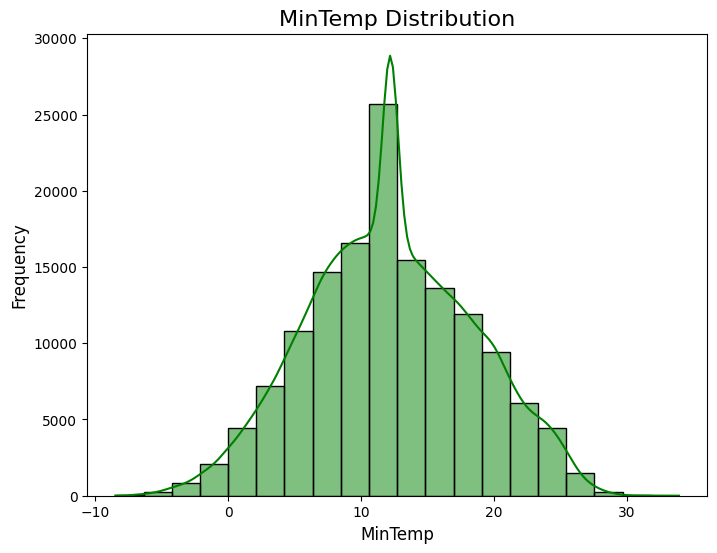

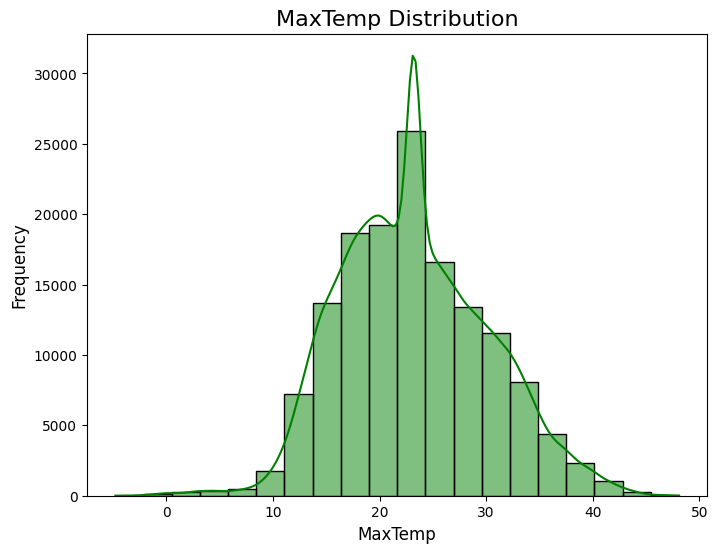

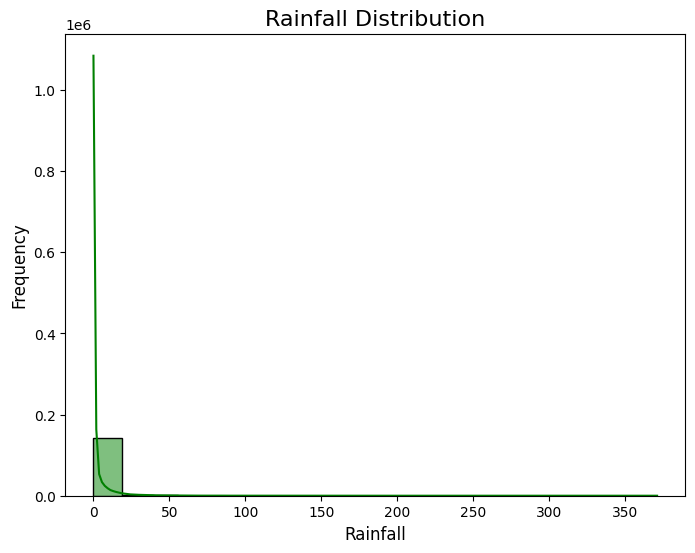

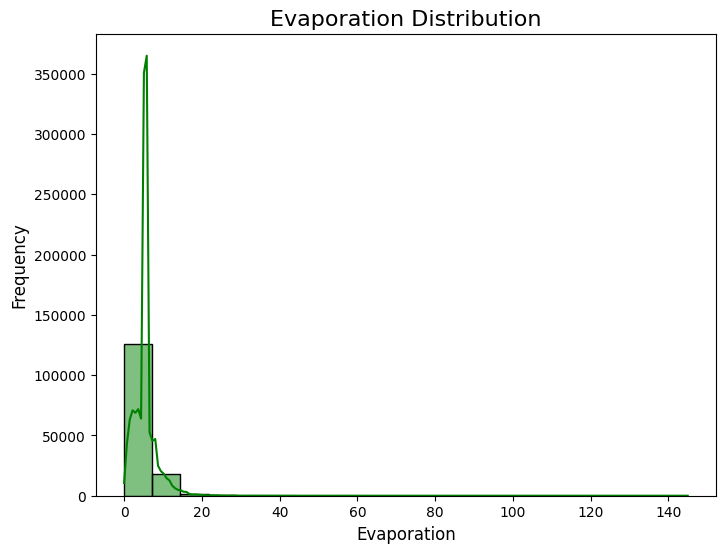

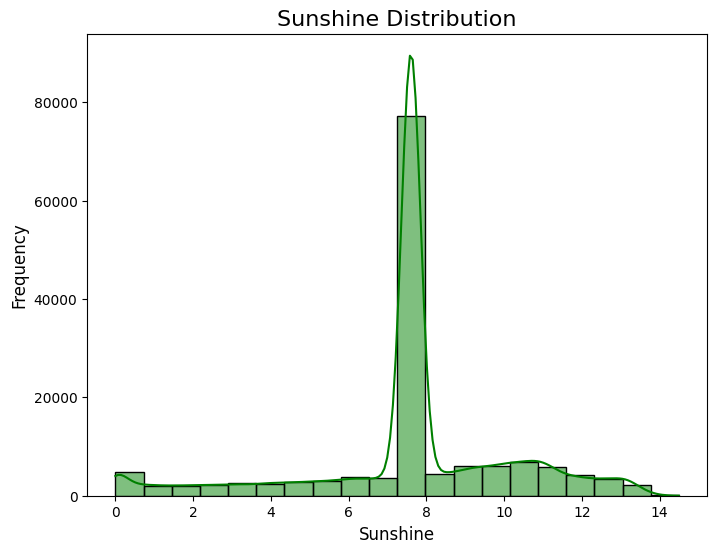

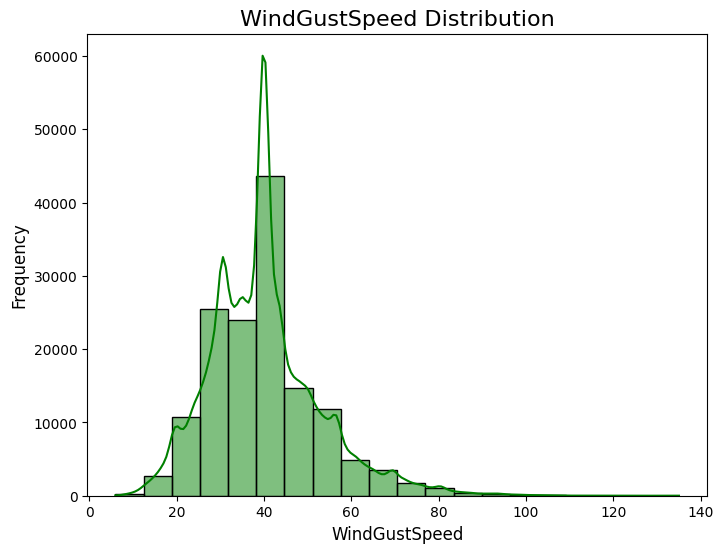

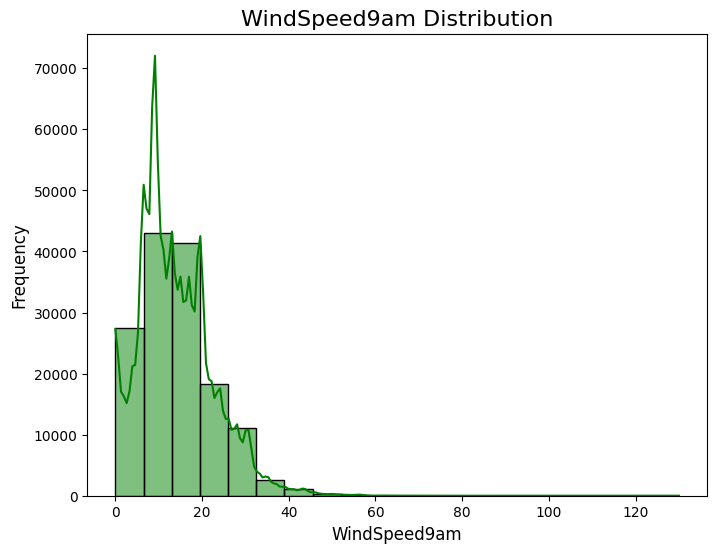

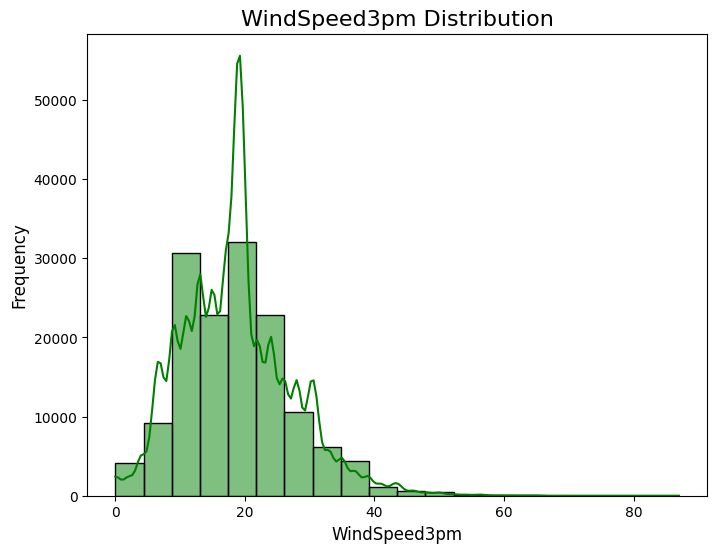

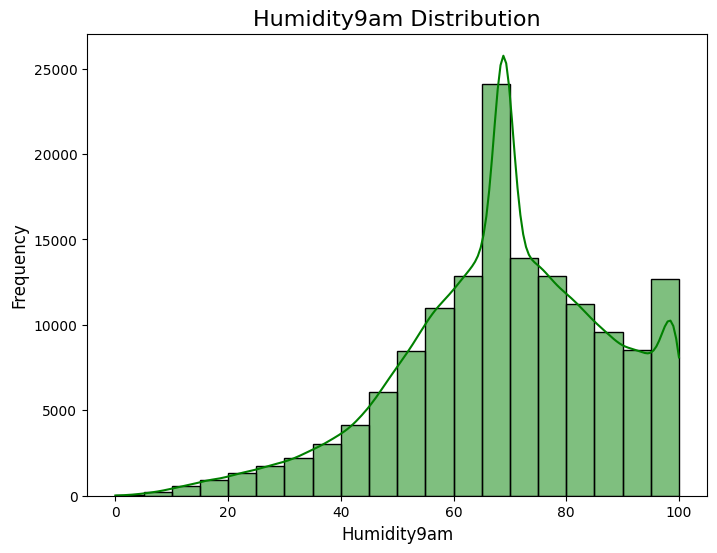

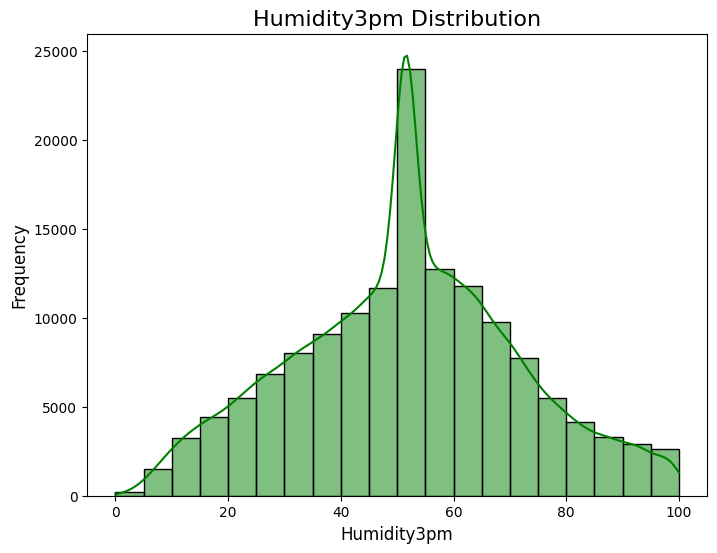

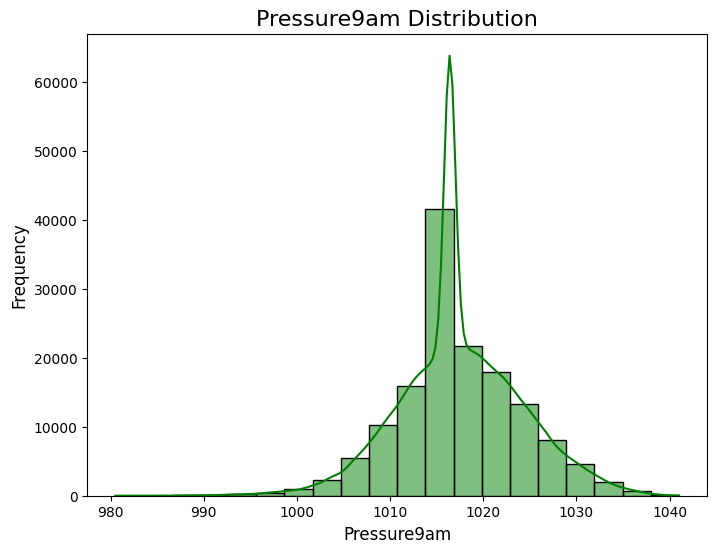

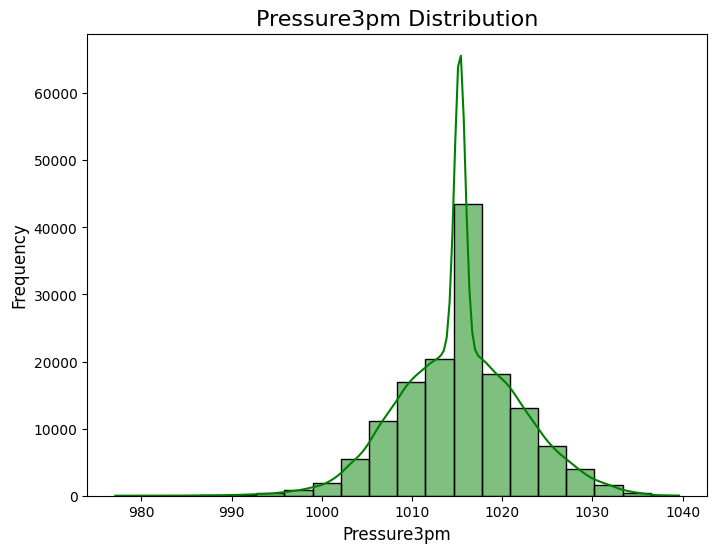

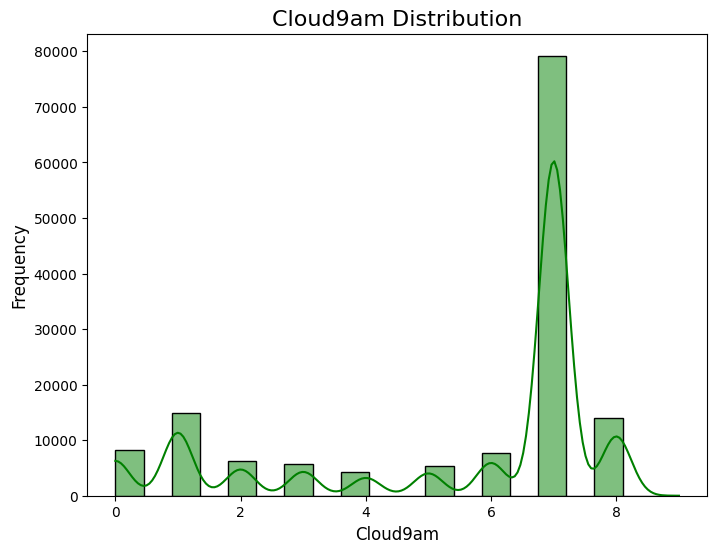

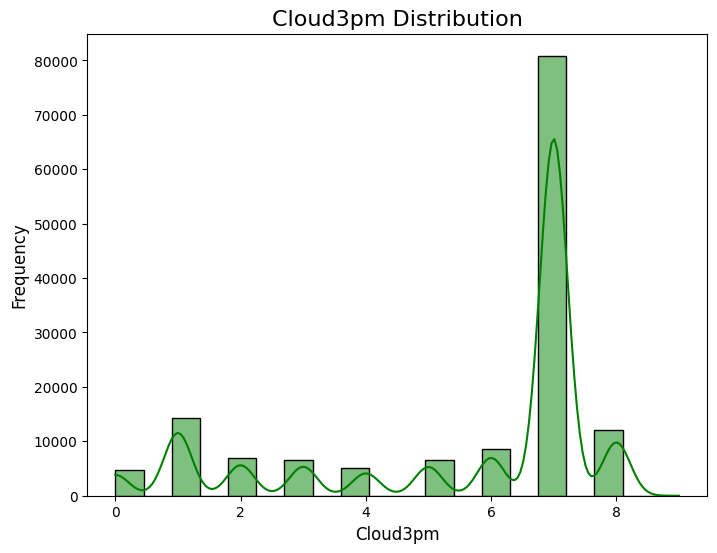

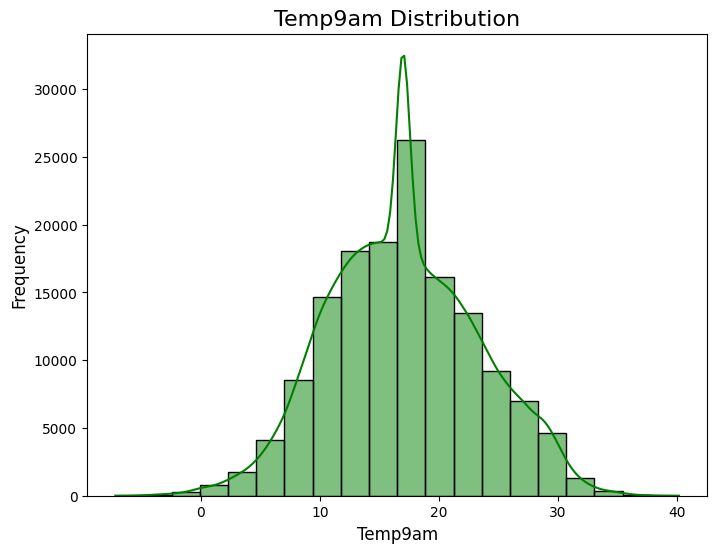

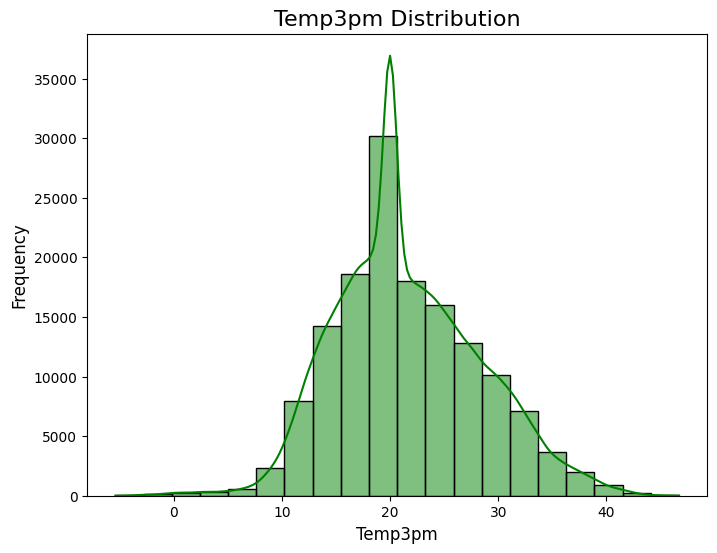

In [125]:
# Tüm sayısal sütunlar için histogram oluşturma
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=20, kde=True, color='green')
    plt.title(f'{col} Distribution', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

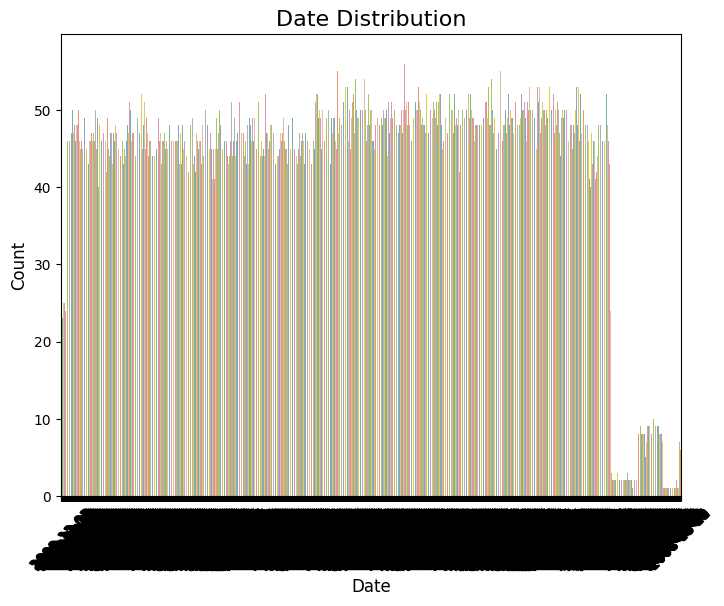

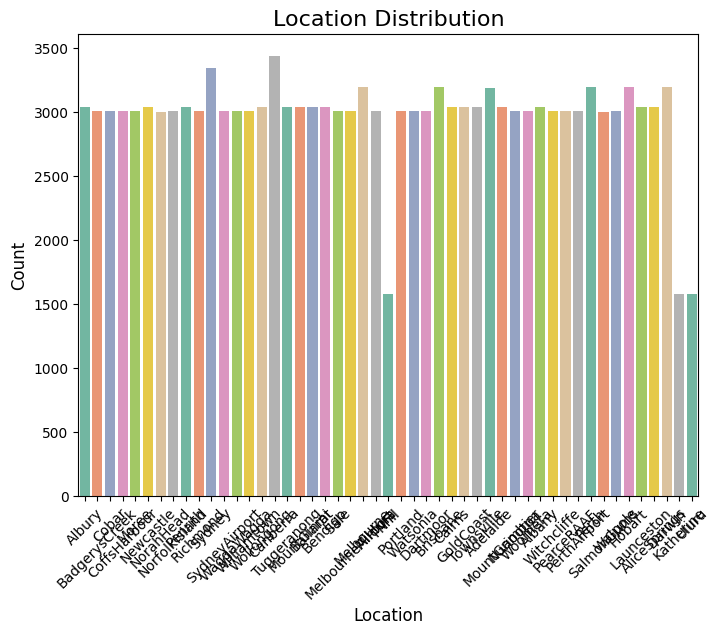

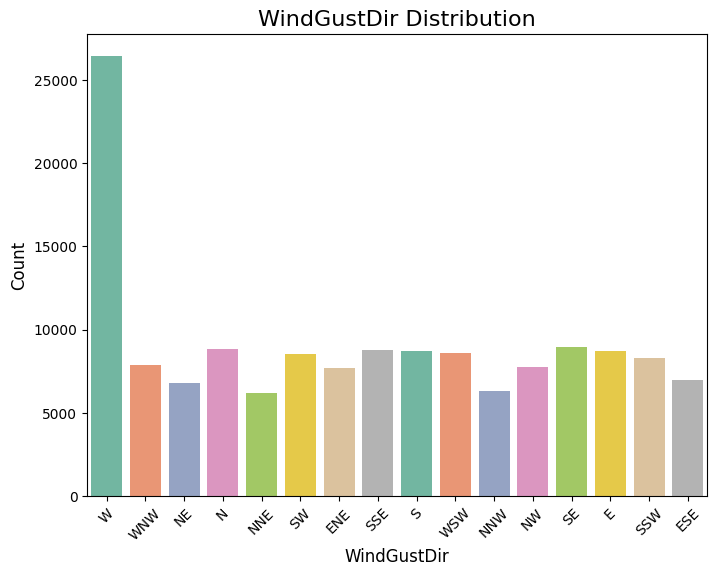

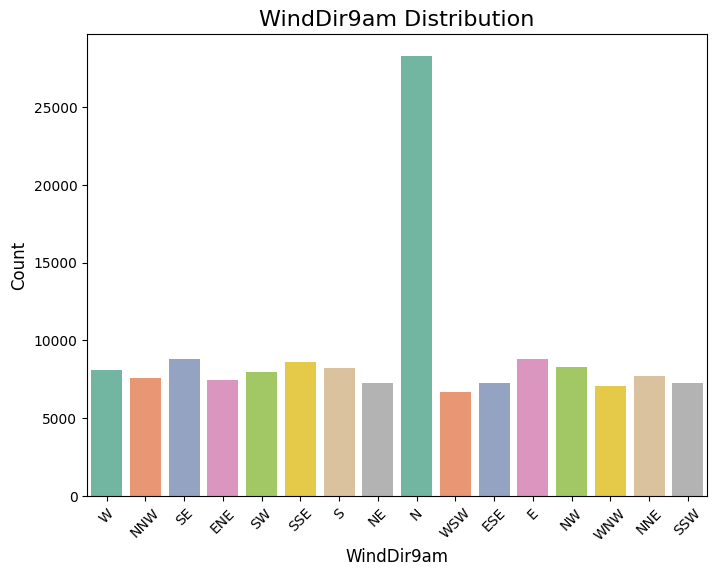

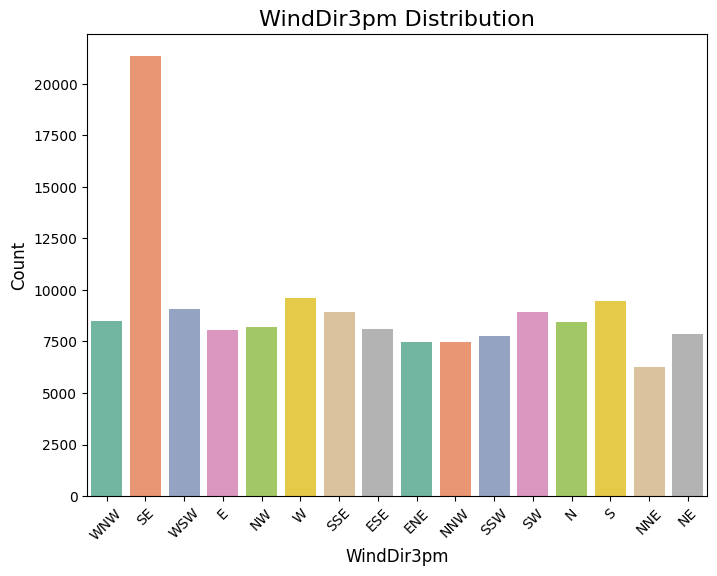

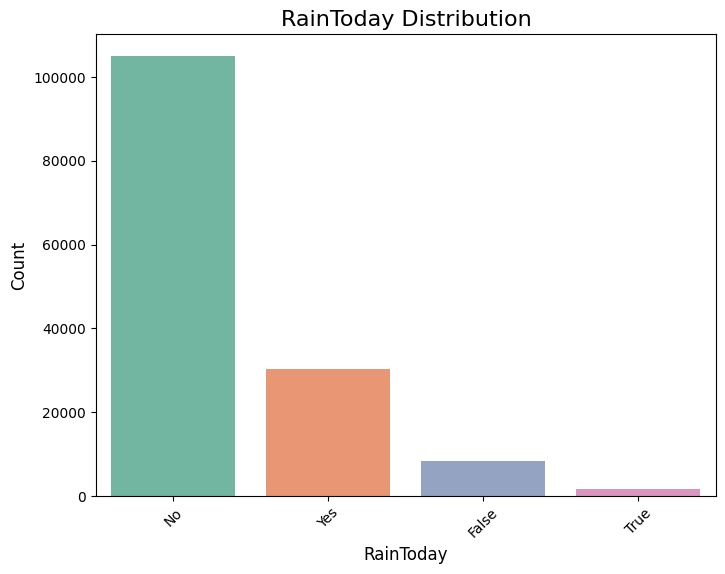

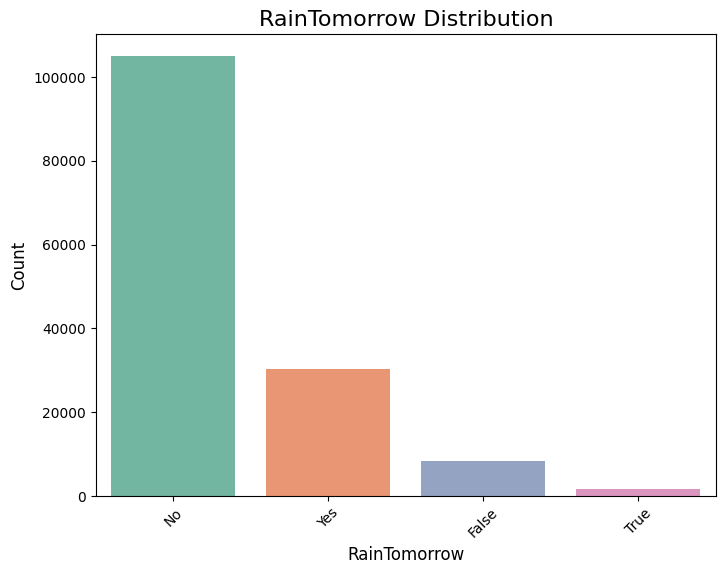

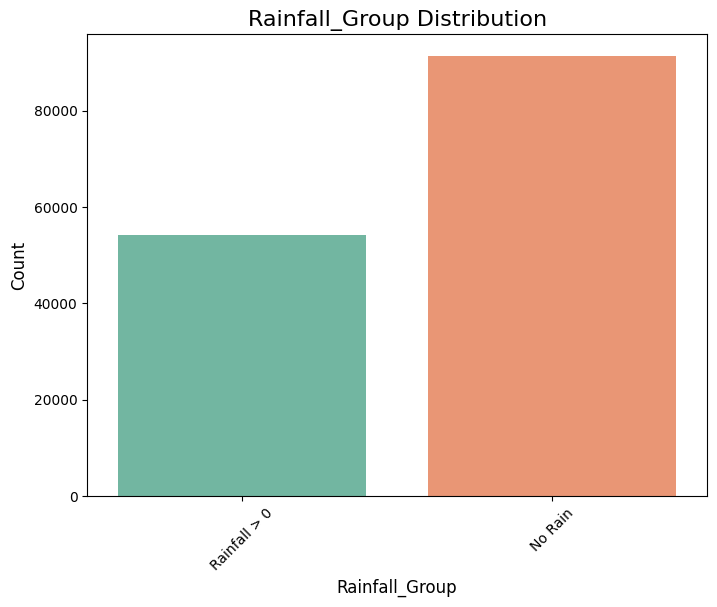

In [126]:
# Tüm kategorik sütunlar için bar chart
for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'{col} Distribution', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)  # Kategoriler uzun ise döndür
    plt.show()

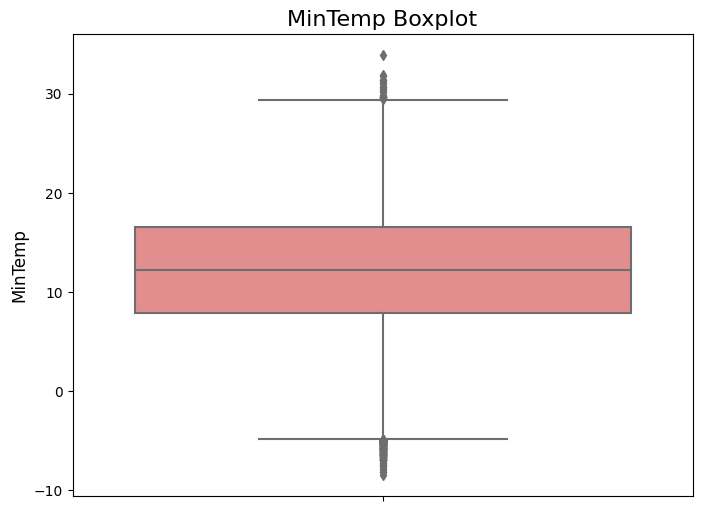

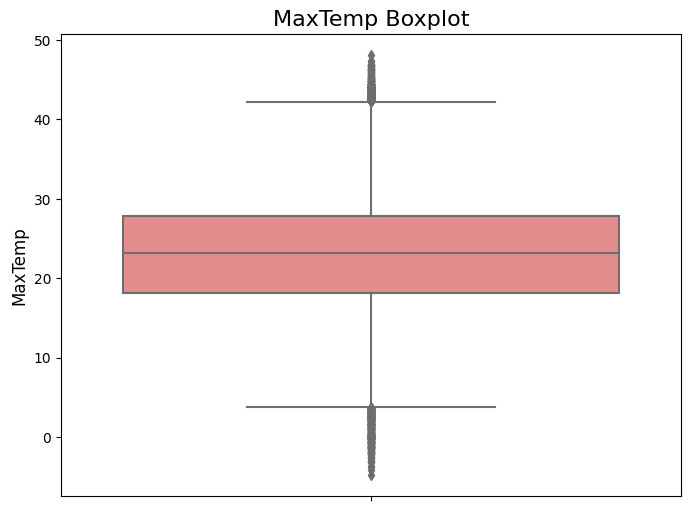

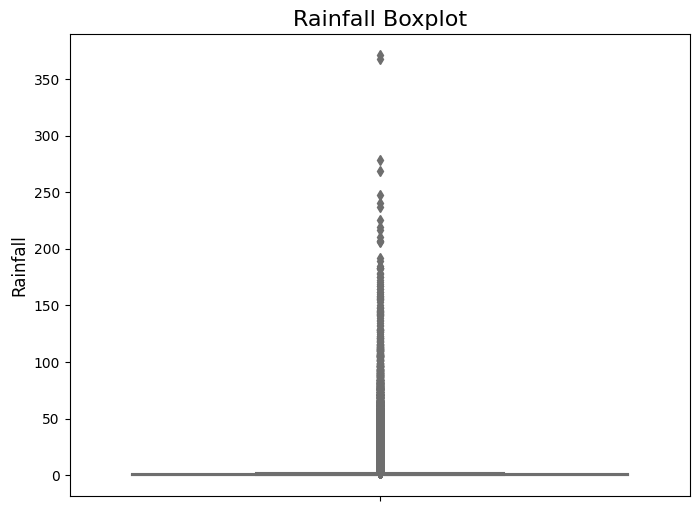

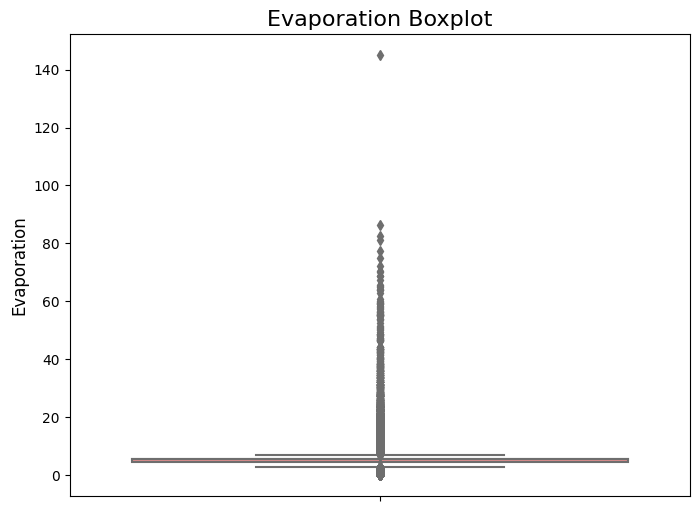

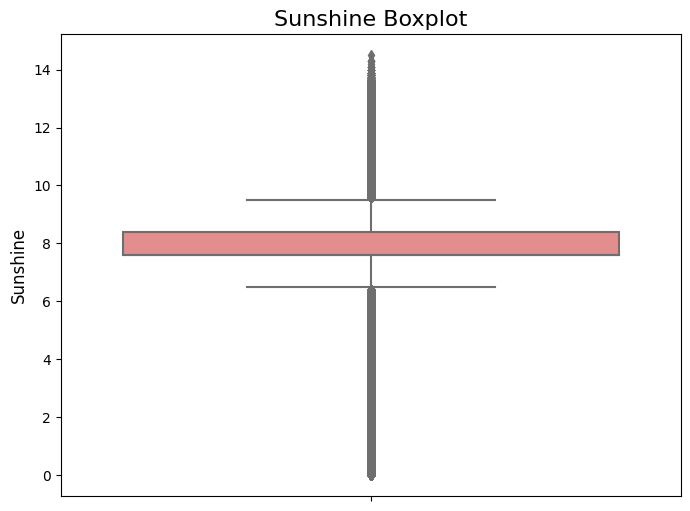

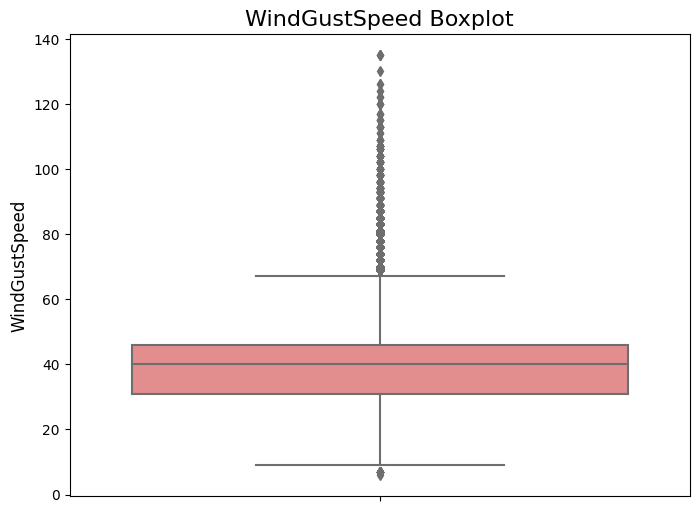

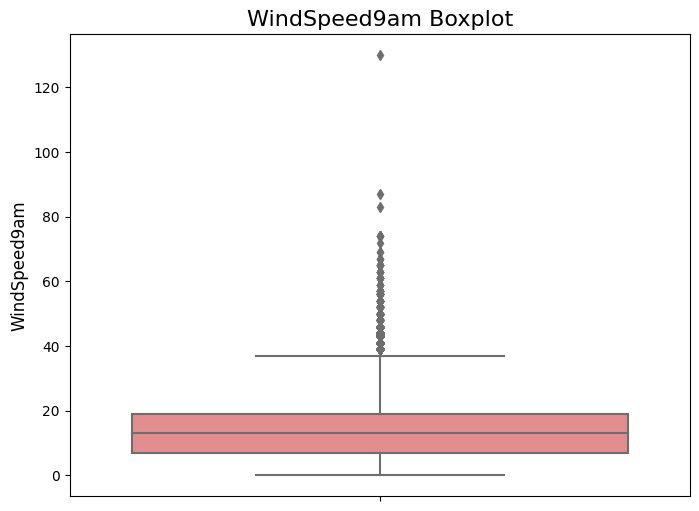

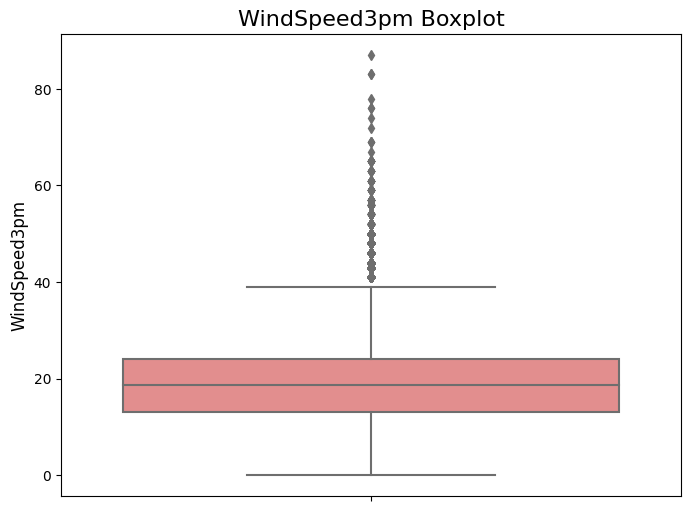

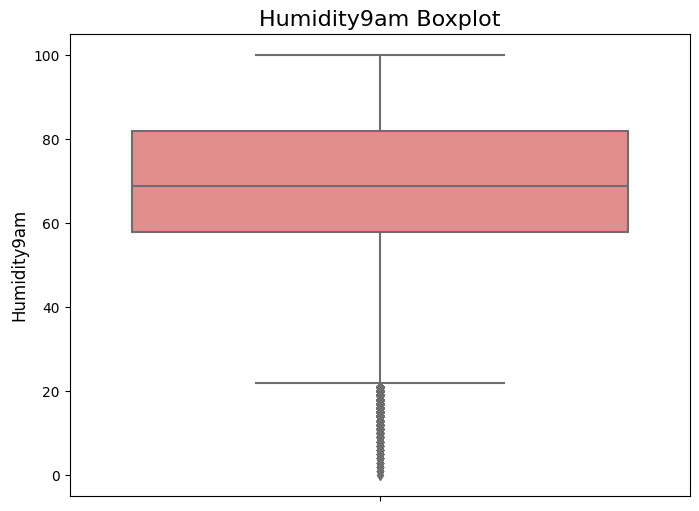

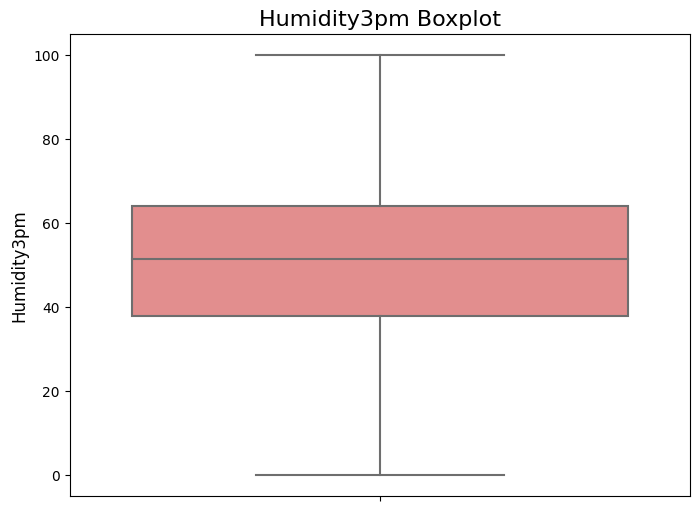

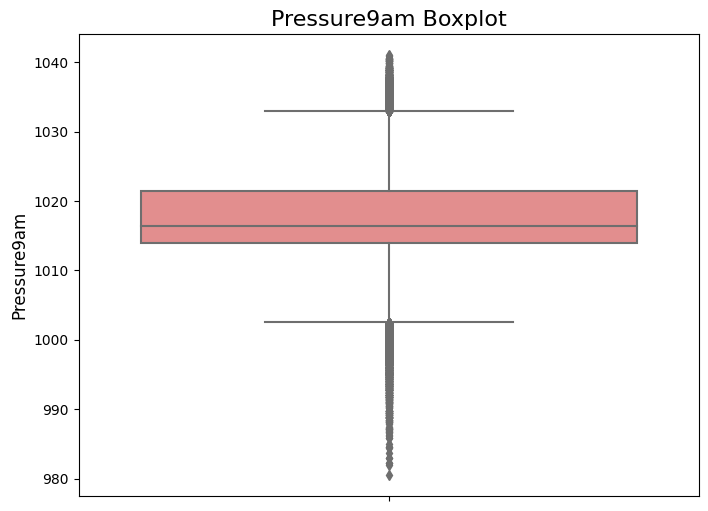

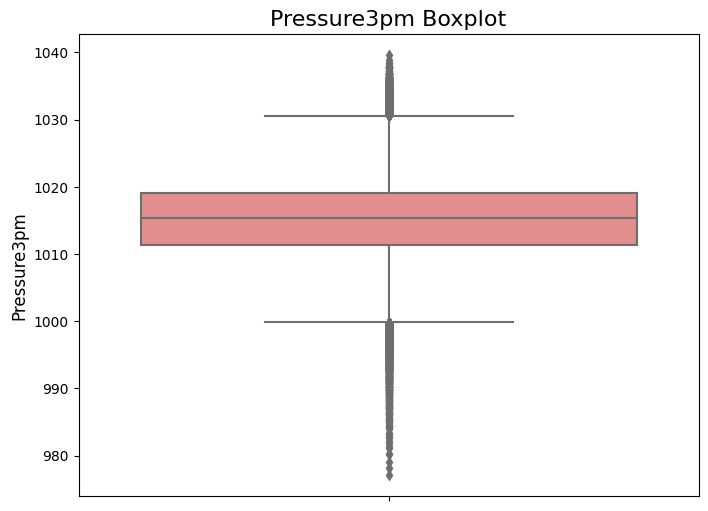

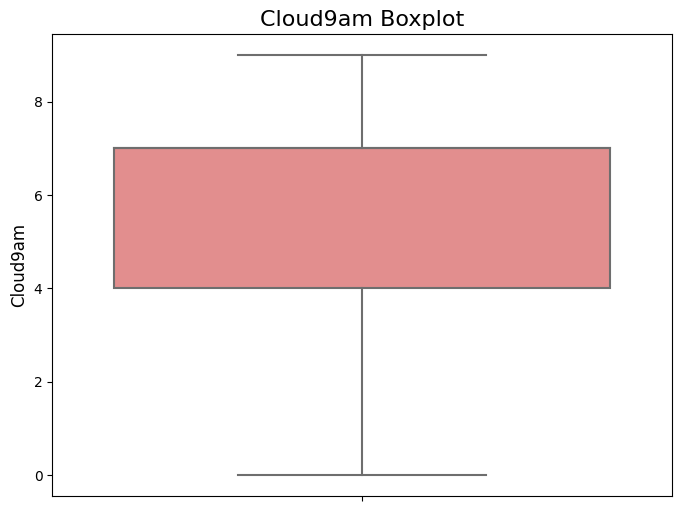

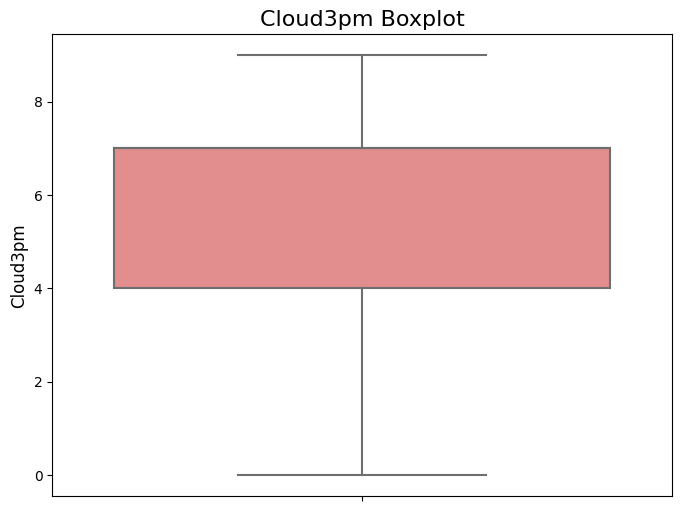

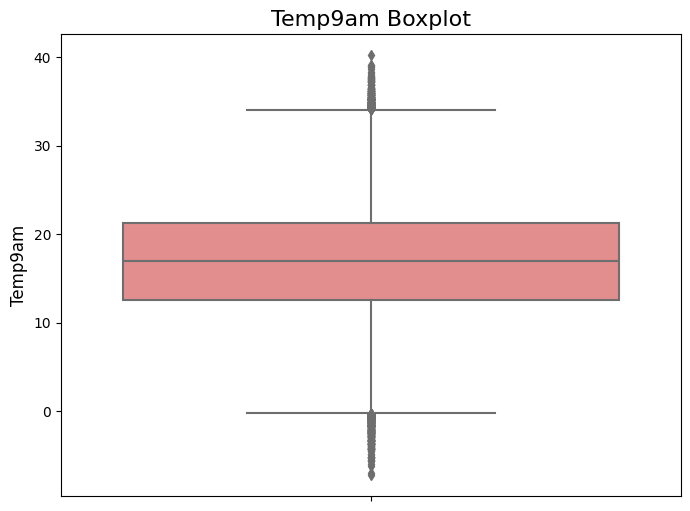

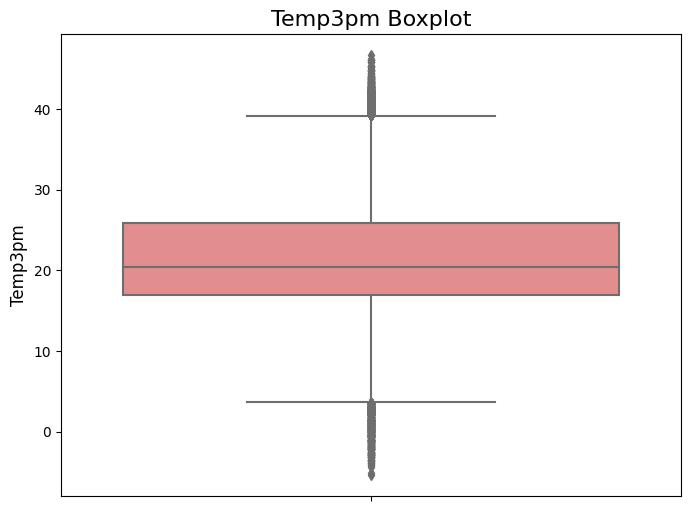

In [127]:
# Tüm sayısal sütunlar için kutu grafikleri
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=col, color='lightcoral')
    plt.title(f'{col} Boxplot', fontsize=16)
    plt.ylabel(col, fontsize=12)
    plt.show()

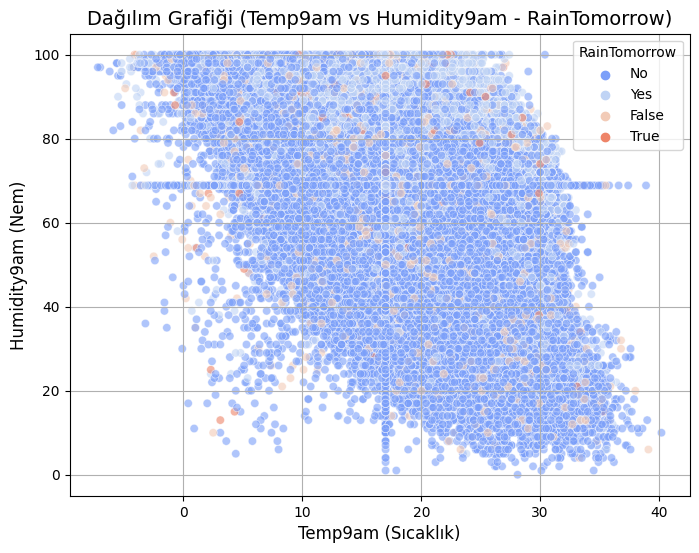

In [128]:
# Kategorik değişken ile dağılım grafiği
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temp9am', y='Humidity9am', hue='RainTomorrow', data=df, palette='coolwarm', alpha=0.6)
plt.title('Dağılım Grafiği (Temp9am vs Humidity9am - RainTomorrow)', fontsize=14)
plt.xlabel('Temp9am (Sıcaklık)', fontsize=12)
plt.ylabel('Humidity9am (Nem)', fontsize=12)
plt.grid(True)
plt.show()

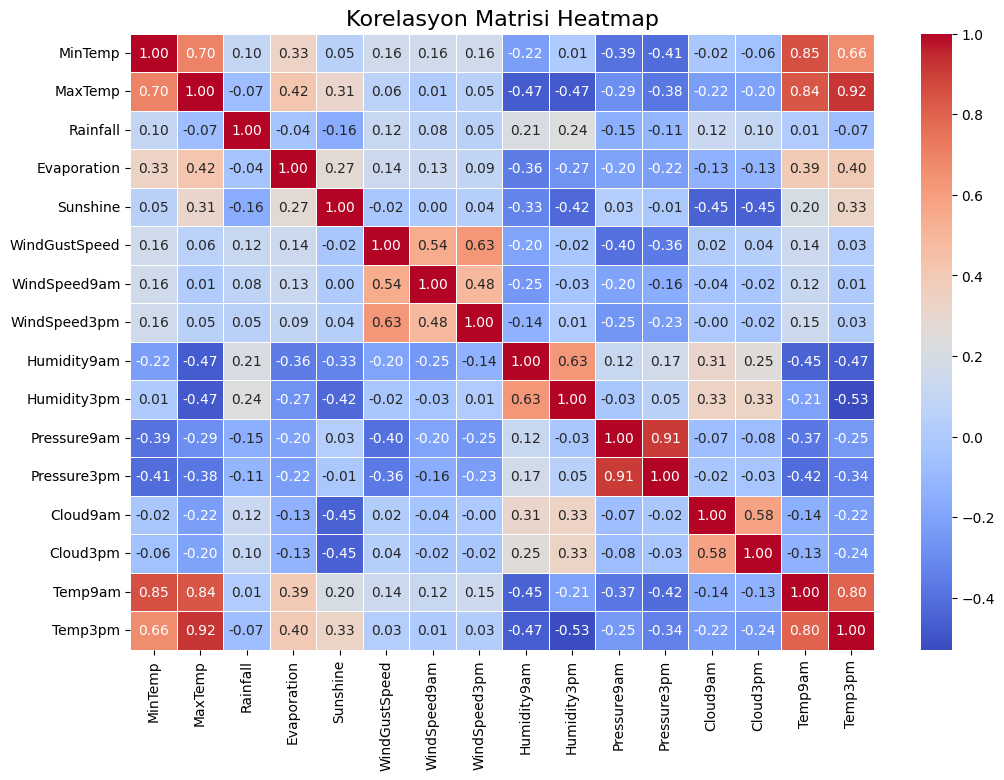

In [129]:
# Korelasyon matrisi hesaplama (sayısal değişkenler için)
correlation_matrix = df[numerical_features].corr()

# Heatmap oluşturma
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True,   # Her hücrede korelasyon değerlerini göster
            fmt=".2f",    # Ondalık formatı
            cmap="coolwarm", # Renk paleti
            linewidths=0.5) # Hücreler arasında çizgi

plt.title("Korelasyon Matrisi Heatmap", fontsize=16)
plt.show()